## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images, and extract the object points and images points

## Compute camera calibration and distortion correction for chessboard images

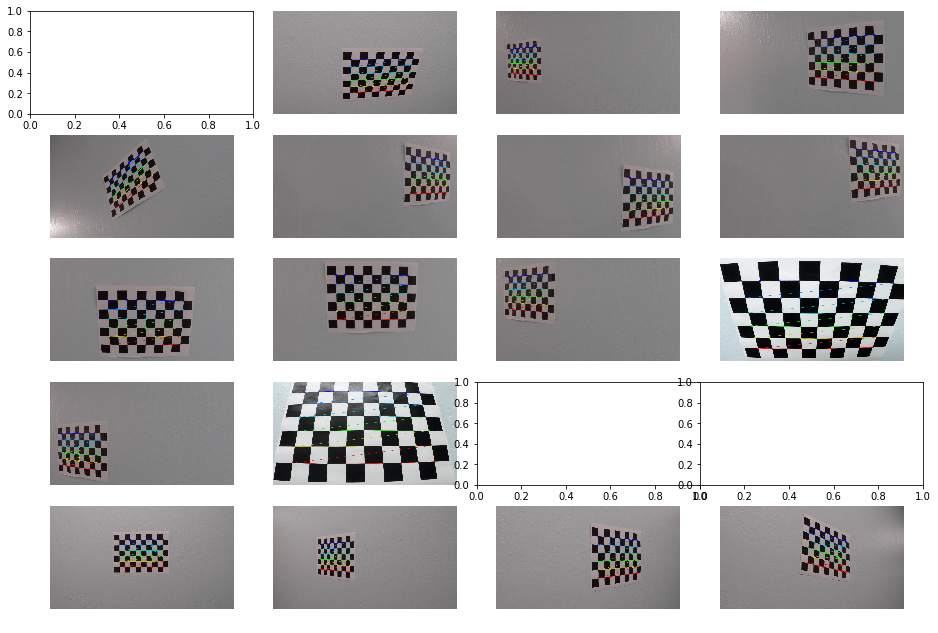

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
nx=9
ny=6
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

fig, axs = plt.subplots(5,4, figsize=(16, 11))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        #ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        axs[i].axis('off')
        axs[i].imshow(img)
        #plt.imshow('img',img)
        #cv2.waitKey(500)

#cv2.destroyAllWindows()


## Undistort and unwarp the images using camera calibration and perspective transform for Chessboards
### - In this section, objection points and image points are calculated based on a set of chessboard images, and then compute camera matrix and distortion coefficients using cv2.calibrateCamera
### - Using perspective transform to get the "bird view" image

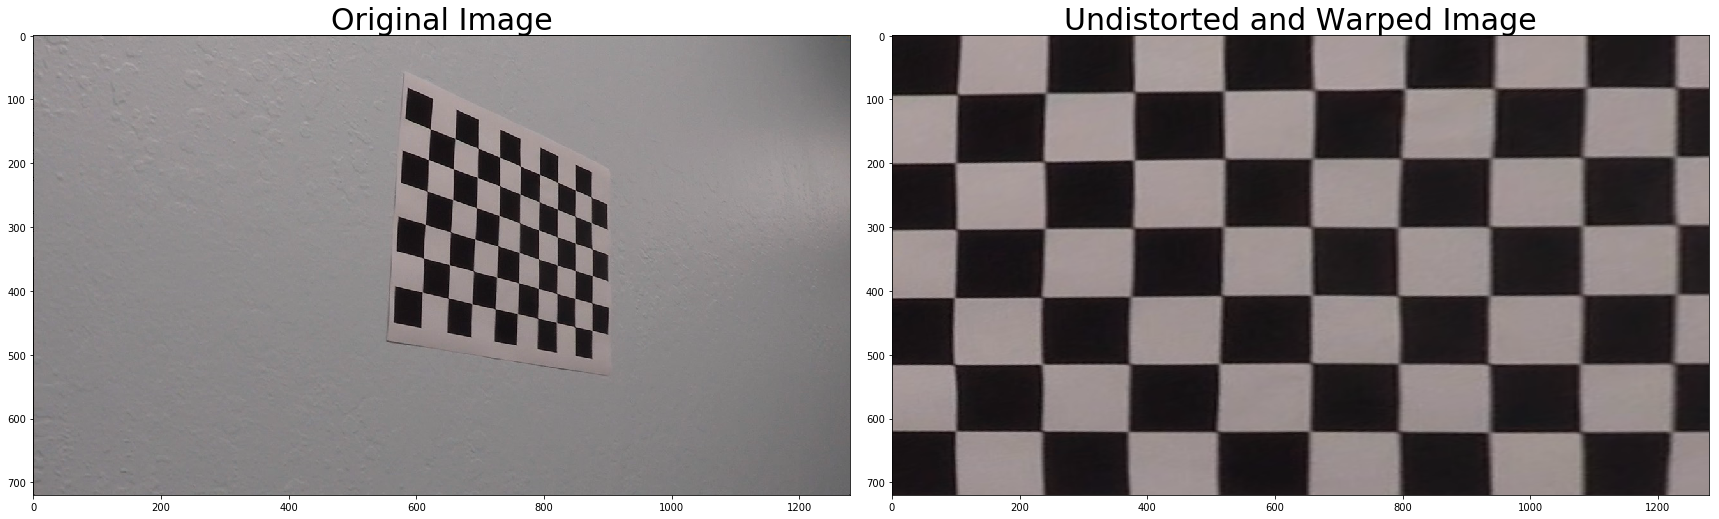

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
nx=9
ny=6
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')
img=cv2.imread(images[19])
img=np.array(img)

## Define the function for image unwarp
def Unwarp_img(img, nx, ny):
        # Find the chessboard corners
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners=cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

        undist = cv2.undistort(img, mtx, dist, None, mtx)
        offset=100 
        img_size=(gray.shape[1],gray.shape[0])
        src=np.float32([corners[0,:,:], corners[nx-1,:,:],corners[-1,:,:],corners[-nx,:,:]])
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        Minv = cv2.getPerspectiveTransform(dst, src)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)
    return warped, M

warped_img, perspective_M=Unwarp_img(img, nx, ny)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(warped_img)
ax2.set_title('Undistorted and Warped Image', fontsize=30)
plt.savefig('Undistorted_Warped_Image.png')


# Pipeline for Lane detection on images

#### Apply Camera calibration, distortion correction, color&gradients threshold and perspective transforms to the raw testing images
In this section, all images can be undistorted by using camera calibration parameters, and define a user-defined function, in which camera parameters and all distortion coefficients are obtained for each of single image


This image is: <class 'numpy.ndarray'> with dimensions of (720, 1280, 3)


Text(0.5,1,'Undistorted Image')

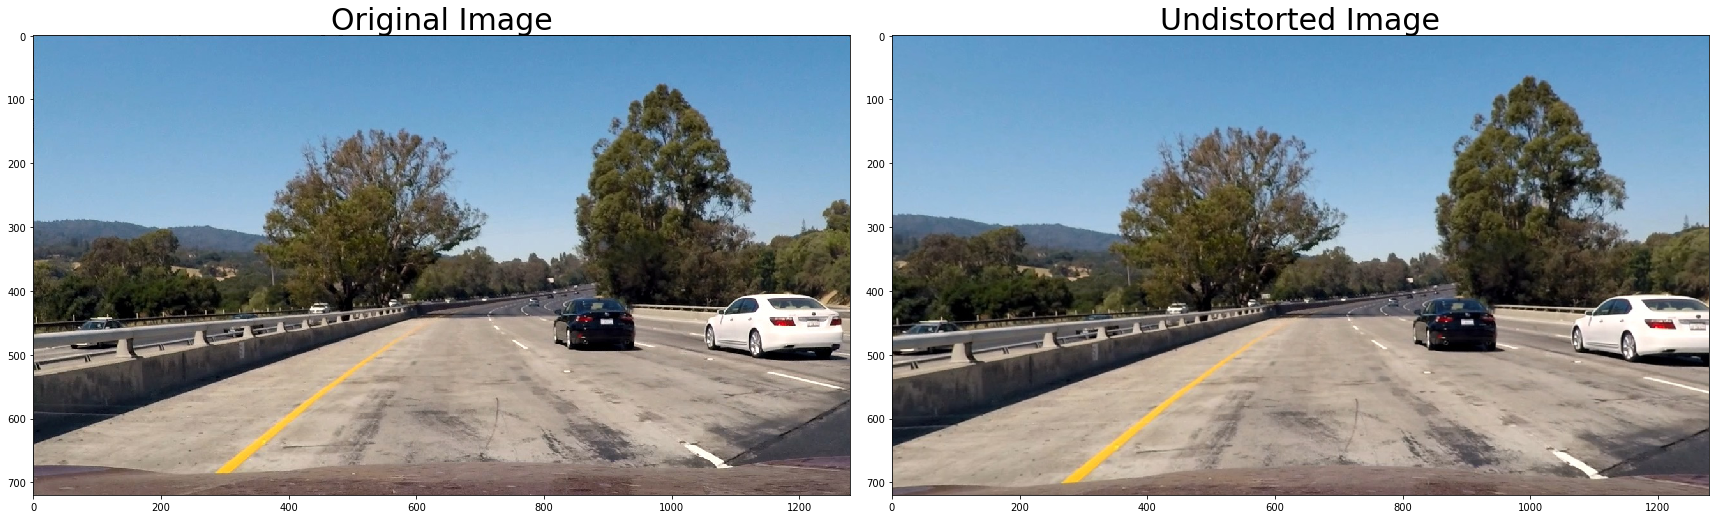

In [3]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
## Apply Camera calibration, distortion correction
def camera_calibration():
    nx=9
    ny=6
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
    images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
    for fname in images:
        img_chess = cv2.imread(fname)
        gray_chess = cv2.cvtColor(img_chess,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray_chess, (9,6),None)
    

    # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
    shape=gray_chess.shape[::-1]
    np.save('objpoints', objpoints)
    np.save('imgpoints', imgpoints)
    np.save('shape', shape)
    
    return None
## Apply Camera calibration, distortion correction
def undistortion(img):
# Arrays to store object points and image points from all the images.
    objpoints = np.load('objpoints.npy') # 3d points in real world space
    imgpoints = np.load('imgpoints.npy') # 2d points in image plane.
    shape=tuple(np.load('shape.npy'))
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints,shape,None, None)
    undist=cv2.undistort(img, mtx, dist, None, mtx)
    return undist  

# read an image from a folder
#img=mpimg.imread('solidYellowCurve2.jpg')
img=cv2.imread('../test_images/test1.jpg')
b,g,r=cv2.split(img)
img=cv2.merge([r,g,b])
original_img=img
# print out some info about this image
#img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print ('This image is:', type(img),'with dimensions of',img.shape)

# transform from color to gray scale
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #mpimg loads image as RGB
dst=undistortion(img)
f, (ax1, ax2)=plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
  

#### Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image.  Provide an example of a binary image result.
I used a combination of color and gradient thresholds to generate a binary image, Here's an example of my output for this step. 
In this function, I used both absolute sobelx and sobely to detect the edge, and applied yellow mask and white mask using color threshold techniques on HSV color space. In order to avoid the brightness and shadowness, I also converted the image to LAB color space and applied [145, 200] on B channel.

Text(0.5,1,'gradient threshold')

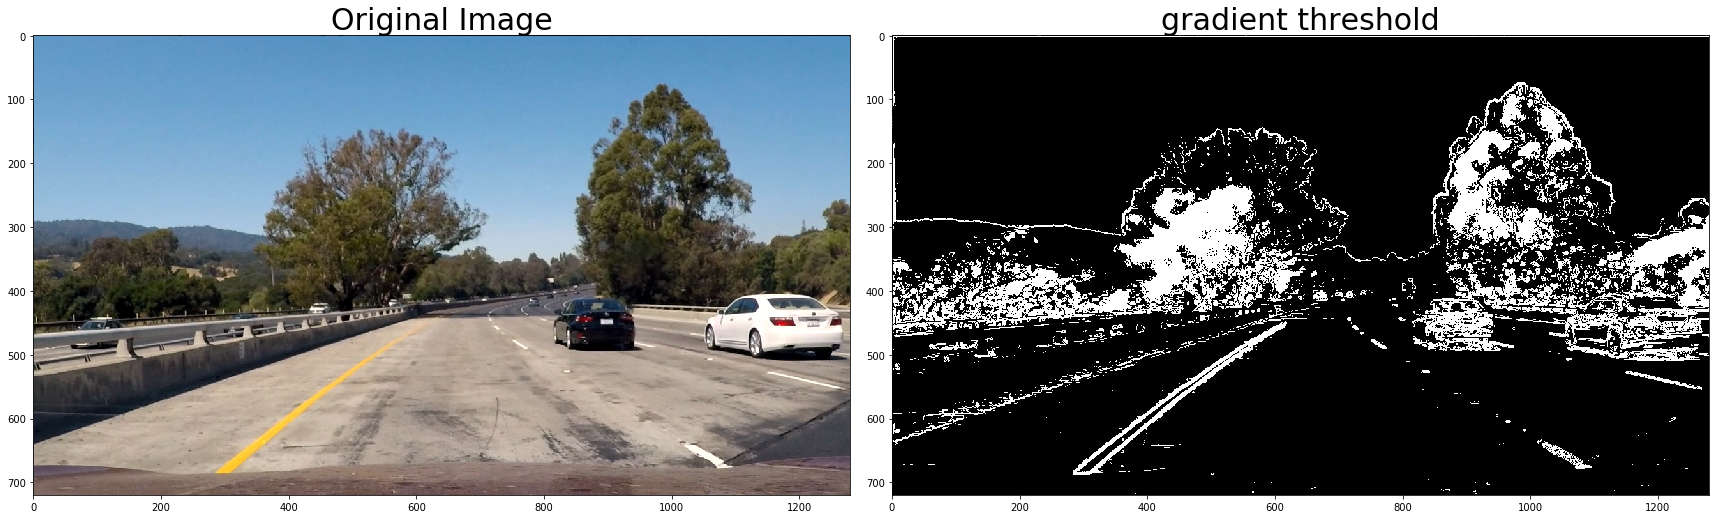

In [4]:

thresh_grad_min = 20
thresh_grad_max = 200
## Define Color & gradients function
def color_threshold(img, thresh_grad_min, thresh_grad_max):
    hls=cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel=hls[:,:,2]
    h_channel=hls[:,:,0]
    l_channel=hls[:,:,1]
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hsv=cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    ## Sobelx
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    
    ## Sobely
    sobely = cv2.Sobel(s_channel, cv2.CV_64F, 0, 1) # Take the derivative in y
    abs_sobely = np.absolute(sobely) # Absolute x derivative to accentuate lines away from horizontal
    mag=np.sqrt(sobelx**2+sobely**2)
    scaled_sobel = np.uint8(255*mag/np.max(mag))
    # Threshold xy gradient
    sxybinary = np.zeros_like(scaled_sobel)
    sxybinary[(scaled_sobel >= thresh_grad_min) & (scaled_sobel <= thresh_grad_max)] = 1
    
    # detecting yellows using hsv color space
    yellow_low=np.array([0,100,100], np.uint8)
    yellow_high=np.array([50, 255, 255], np.uint8)
    mask_yellow=cv2.inRange(hsv, yellow_low, yellow_high)
    
    # detecting white using hsv color space
    white_low=np.array([20, 0, 200], np.uint8)
    white_high=np.array([255, 80, 255], np.uint8)
    mask_white=cv2.inRange(hsv, white_low, white_high)
    mask=cv2.bitwise_or(mask_yellow, mask_white)
    
    # detecting edge using color threshold in s_channel
    #color_thre_min=145
    #color_thre_max=200
    #s_binary=np.zeros_like(s_channel)
    #s_binary[(s_channel>=color_thre_min)&(s_channel<color_thre_max)]=1
    # detecting shadowness and brightness change
    color_thre_min=145
    color_thre_max=200
    lab=cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    b_channel=lab[:,:,2]
    b_binary=np.zeros_like(b_channel)
    b_binary[(b_channel>=color_thre_min)&(s_channel<color_thre_max)]=1
    
    
    # stack each channel to an image to see the contribution of individual channels
    #color_binary = np.dstack(( np.zeros_like(sxybinary), sxybinary, mask)) * 255
    # combine three binary thresholds
    combined_binary=np.zeros_like(sxybinary)
    combined_binary[(sxybinary==1)|(mask==1)|(b_binary==1)]=1
    return  combined_binary
out=color_threshold(img, thresh_grad_min, thresh_grad_max)

f, (ax1, ax2)=plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(out, cmap='gray')
ax2.set_title('gradient threshold', fontsize=30)
  

#### Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.
The code for my perspective transform includes a function called `warped_img()`, which appears in lines 1 through 15 in the IPython notebook block below.  The `warped_img()` function takes as inputs an image (`img`), as well as source (`src`) and destination (`dst`) points.  I chose the hardcode the source and destination points in the following manner:

| Source        | Destination   | 
|:-------------:|:-------------:| 
| 580, 460      | 200, 0        | 
| 700, 460      | 1000, 0       |
| 1040, 680     | 1000,720      |
| 260, 680      | 200, 720      |

```python
src=np.float32([[580,460],[700,460],[1040,680],[260,680]])
dst = np.array([[200, 0], [1000, 0], [1000, img.shape[0]], [200, img.shape[0]]], np.float32)
```
I verified that my perspective transform was working as expected by drawing the `src` and `dst` points onto a test image and its warped counterpart to verify that the lines appear parallel in the warped image.

Text(0.5,1,'Warped image')

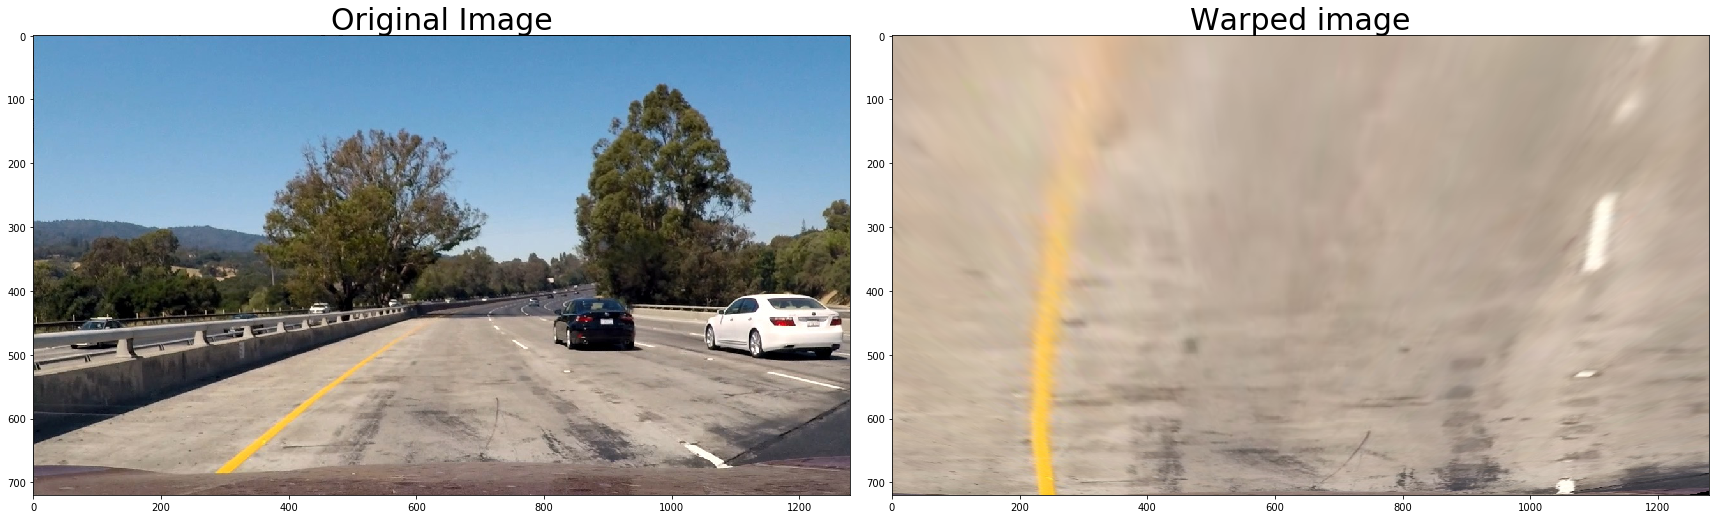

In [5]:
## Perspective transform
## Define the function for image unwarp
def warped_img(img):
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_size=(gray.shape[1],gray.shape[0])
    #src=np.float32([[500,500],[780,500],[img.shape[1],img.shape[0]],[150,img.shape[0]]])
    src=np.float32([[580,460],[700,460],[1040,680],[260,680]])
    dst = np.array([[200, 0], [1000, 0], [1000, img.shape[0]], [200, img.shape[0]]], np.float32)
# Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
# Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(img, M, img_size)
    return warped, M, Minv
img_warped, M, Minv=warped_img(img)

f, (ax1, ax2)=plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(img_warped)
ax2.set_title('Warped image', fontsize=30)
    

#### Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?
I did this in the IPython notebook block below. 
As for curvature measurement, I took the average of left and right lane curvatures. 

Text(0.5,1,'warped binary')

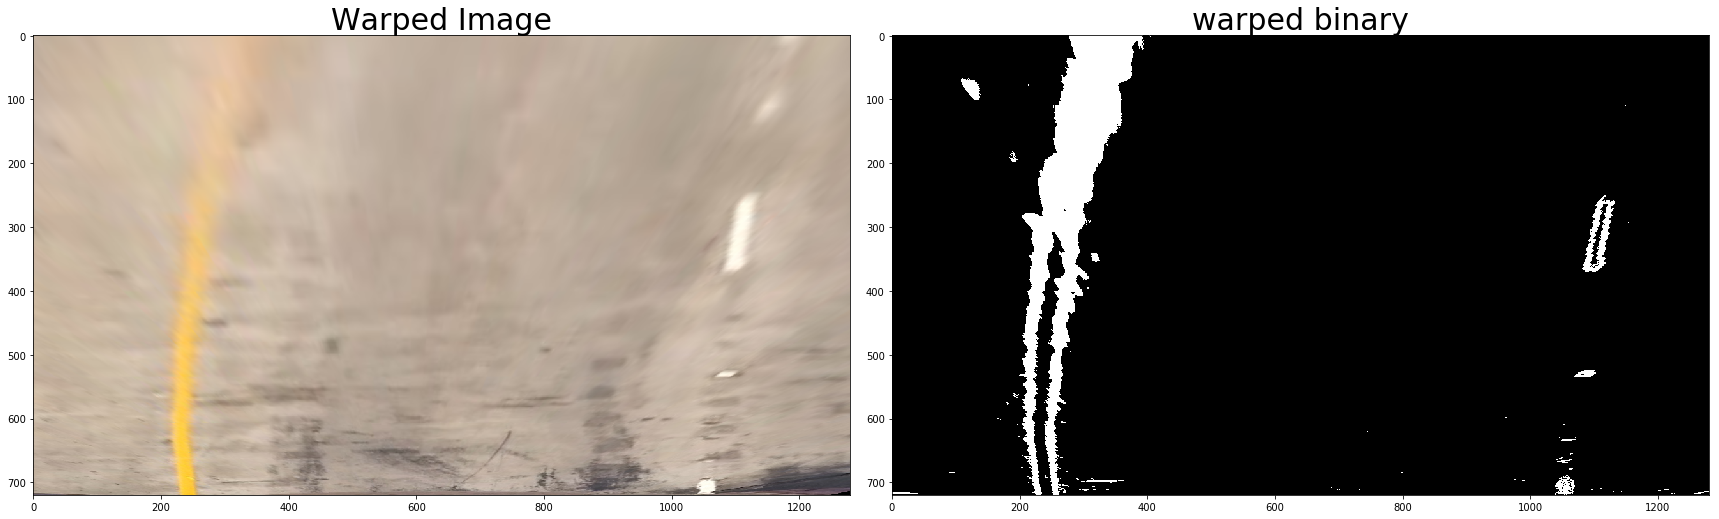

In [13]:

## Define the function of detecting lane lines

def find_lines(binary):
    # calculate the current base leftx and rightx pixels location
    image_height=binary.shape[0]
    image_width=binary.shape[1]
    histogram=np.sum(binary[binary.shape[0]//2:,:], axis=0)
    midpoint=np.int(binary.shape[1]//2)
    leftx_base=np.argmax(histogram[:midpoint])           # define the base left lanes location
    rightx_base=np.argmax(histogram[midpoint:])+midpoint  # define the base right lanes location
    leftx_current=leftx_base
    rightx_current=rightx_base
    out_img=np.dstack((binary, binary, binary))
    # nonzero x & y locations
    nonzerox=np.array(binary.nonzero()[1])
    nonzeroy=np.array(binary.nonzero()[0])
    # left and right lane lines indices
    leftx_ind, rightx_ind=[],[]
    # Hyper parameters for windows
    nwindow=9
    margin=100
    minpxl=50
    
    for window in range(nwindow):
        # define the parameters of windwos on image
        win_height=np.int(image_height//nwindow)
        win_y_low=image_height-(window+1)*win_height
        win_y_high=image_height-window*win_height
        win_left_low=leftx_current-margin
        win_left_high=leftx_current+margin
        win_right_low=rightx_current-margin
        win_right_high=rightx_current+margin
        
        # identify the nonzero pixels within the window
        detected_leftx_ind=((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_left_low) &  (nonzerox < win_left_high)).nonzero()[0]
        
        detected_rightx_ind=((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_right_low) &  (nonzerox < win_right_high)).nonzero()[0]
        
        if len(detected_leftx_ind)>minpxl:
            leftx_current=np.int(np.mean(nonzerox[detected_leftx_ind]))
        if len(detected_rightx_ind)>minpxl:
            rightx_current=np.int(np.mean(nonzerox[detected_rightx_ind]))
        leftx_ind.append(detected_leftx_ind)
        rightx_ind.append(detected_rightx_ind)
    try:
        leftx_ind=np.concatenate(leftx_ind)
        rightx_ind=np.concatenate(rightx_ind)
    except ValueErrors:
        
        pass
    
    leftx=nonzerox[leftx_ind]
    rightx=nonzerox[rightx_ind]
    lefty=nonzeroy[leftx_ind]
    righty=nonzeroy[rightx_ind]
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary.shape[0]-1, binary.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
    
    return left_fitx, right_fitx, ploty

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

# define polynomial function of lane lines

def polynomial_fit(binary, Minv, left_fitx, right_fitx, ploty):

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (binary.shape[1], binary.shape[0])) 
    

    ## Visualization ##
    # Colors in the left and right lane regions
    #out_img[lefty, leftx] = [255, 0, 0]
    #out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    #plt.plot(left_fitx, ploty, color='yellow')
    #plt.plot(right_fitx, ploty, color='yellow')
    return newwarp

def curvature_cal(binary):
    # Find our lane pixels first
    leftx, rightx, ploty = find_lines(binary)
    # covert x, y from pixels to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    image_height=binary.shape[0]
    image_width=binary.shape[1]
    histogram=np.sum(binary[binary.shape[0]//2:,:], axis=0)
    midpoint=np.int(binary.shape[1]//2)
    leftx_base=np.argmax(histogram[:midpoint])           # define the base left lanes location
    rightx_base=np.argmax(histogram[midpoint:])+midpoint  # define the base right lanes location
    lane_center=np.int((leftx_base+rightx_base)//2)
    img_center=np.int(image_width//2)
    Veh_pos=np.float32((img_center-lane_center)*xm_per_pix)  # calculate the vehicel position, left '-', right off center '+'
    
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)

    # Generate x and y values for plotting
    y_eval=np.max(ploty)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    lane_curverad=(left_curverad+right_curverad)/2

    return lane_curverad, Veh_pos

warped_binary=color_threshold(img_warped, thresh_grad_min, thresh_grad_max)

f, (ax1, ax2)=plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
ax1.imshow(img_warped)
ax1.set_title('Warped Image', fontsize=30)
ax2.imshow(warped_binary, cmap='gray')
ax2.set_title('warped binary', fontsize=30)

    
    

0.0


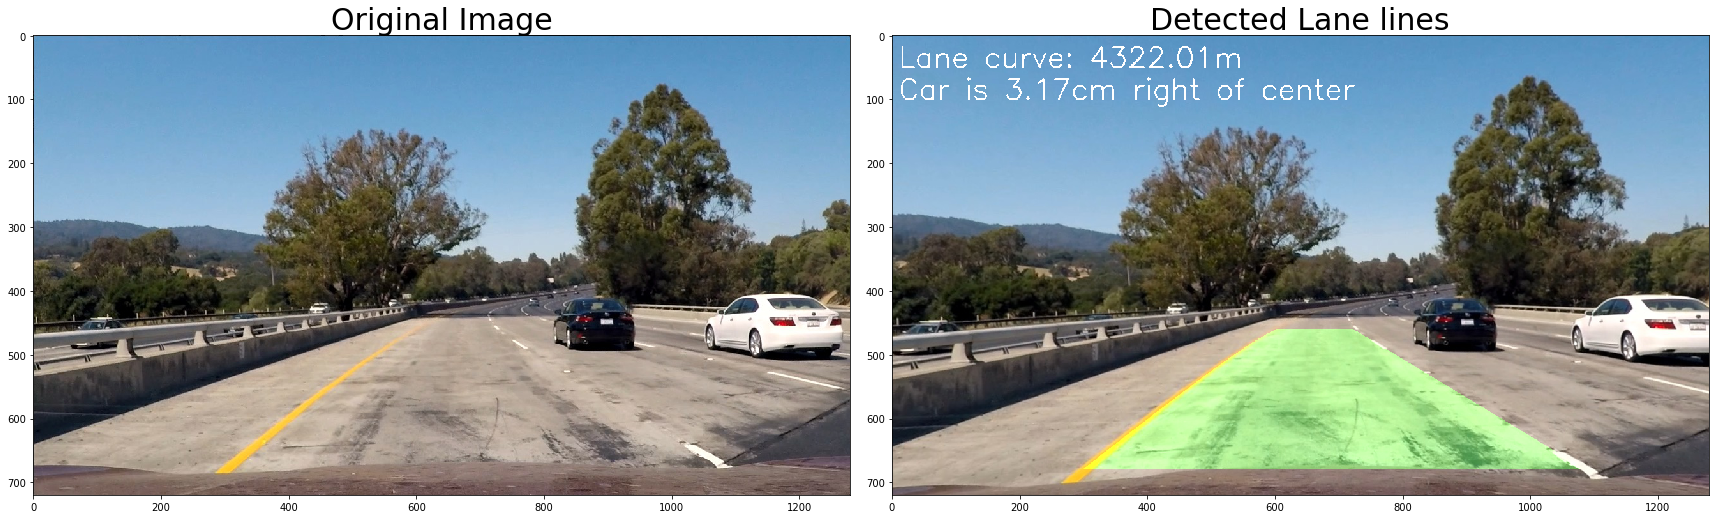

In [14]:

def process_image(img):
    # print out some info about this image
    #img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # transform from color to gray scale
    #b,g,r=cv2.split(img)
    #img=cv2.merge([r,g,b])
    img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #mpimg loads image as RGB
    # Apply Gaussian smoothing 
    #kernel_size=5
    #blur_gray=cv2.GaussianBlur(img_gray,(kernel_size,kernel_size),0,0)
    # Undistort the image

    undistort_img=undistortion(img)
    #color & gradients threshold
    img_warped, perspective_M, Minv=warped_img(undistort_img)
    warped_binary=color_threshold(img_warped, thresh_grad_min, thresh_grad_max)
    vertices = np.array([[(120, 710),(120, 0), (1150, 0), (1200,710)]], dtype=np.int32)
    masked_binary = region_of_interest(warped_binary, vertices)
    left_fitx, right_fitx, ploty=find_lines(masked_binary)
    
    global l_fit_buffer
    global r_fit_buffer
    global old_img_lines

    if old_img_lines is None:
        old_img_lines = masked_binary

    ret = cv2.matchShapes(old_img_lines, masked_binary, 1, 0.0)
    print(ret)
    if ret < 35:
        old_img_lines = masked_binary

        if l_fit_buffer is None:
            l_fit_buffer = np.array([left_fitx])

        if r_fit_buffer is None:
            r_fit_buffer = np.array([right_fitx])

        l_fit_buffer = np.append(l_fit_buffer, [left_fitx], axis=0)[-FILTER_SIZE:]
        r_fit_buffer = np.append(r_fit_buffer, [right_fitx], axis=0)[-FILTER_SIZE:]
        l_fit_mean=np.mean(l_fit_buffer[-15:], axis=0)
        r_fit_mean=np.mean(r_fit_buffer[-15:], axis=0)
    else:
        # Compute the mean
        l_fit_mean = np.mean(l_fit_buffer, axis=0)
        r_fit_mean = np.mean(r_fit_buffer, axis=0)

    


    newwarp=polynomial_fit(warped_binary,Minv, l_fit_mean, r_fit_mean, ploty)
    lane_curverad, Veh_pos=curvature_cal(warped_binary)
    # Combine the result with the original image
    result = cv2.addWeighted(undistort_img, 1, newwarp, 0.3, 0)
    if Veh_pos > 0:
        car_pos_text = "{:04.2f}cm right of center".format(Veh_pos*100)
    else:
        car_pos_text = '{:04.3f}cm left of center'.format(abs(Veh_pos)*100)

    cv2.putText(result, "Lane curve: {:04.2f}m".format(lane_curverad), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5,
                color=(255, 255, 255), thickness=2)
    cv2.putText(result, "Car is {}".format(car_pos_text), (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.5, color=(255, 255, 255),
                thickness=2)

    return result

FILTER_SIZE = 20
old_img_lines = None
l_fit_buffer = None
r_fit_buffer = None
det_img=process_image(original_img)

f, (ax1, ax2)=plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(det_img)
ax2.set_title('Detected Lane lines', fontsize=30)
plt.savefig('../output_images/test6')

## Pipeline (Video)
#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!).
In order to detect the lane lines in the video. the detection of image may be jitter from frame to frame, in order to make sure we can get good quality of polygon, I used cv2.Matchshapes function to compare previous detected lane lines and current lane lines and return a value indicating how much identical of two images, and if the return value is above a tuned threshold, the current left and right x values will not be used to calculate polygon and instead, the average 20 recent leftx_fit and rightx_fit will be used. 
Here's a [https://youtu.be/tJ2cSO0wDSM](./project_video.mp4)

In [19]:
# importing some useful packages
#from moviepy.editor import VideoFileClip
import imageio
imageio.plugins.ffmpeg.download()
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import cv2
import os
from moviepy.editor import VideoFileClip
import glob

## Apply Camera calibration, distortion correction
def undistortion(img):
# Arrays to store object points and image points from all the images.
    objpoints = np.load('objpoints.npy') # 3d points in real world space
    imgpoints = np.load('imgpoints.npy') # 2d points in image plane.
    shape=tuple(np.load('shape.npy'))
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints,shape,None, None)
    undist=cv2.undistort(img, mtx, dist, None, mtx)
    return undist


thresh_grad_min = 20
thresh_grad_max = 200
## Define Color & gradients function
def color_threshold(img, thresh_grad_min, thresh_grad_max):
    hls=cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel=hls[:,:,2]
    h_channel=hls[:,:,0]
    l_channel=hls[:,:,1]
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hsv=cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    ## Sobelx
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    
    ## Sobely
    sobely = cv2.Sobel(s_channel, cv2.CV_64F, 0, 1) # Take the derivative in y
    abs_sobely = np.absolute(sobely) # Absolute x derivative to accentuate lines away from horizontal
    mag=np.sqrt(sobelx**2+sobely**2)
    scaled_sobel = np.uint8(255*mag/np.max(mag))
    # Threshold xy gradient
    sxybinary = np.zeros_like(scaled_sobel)
    sxybinary[(scaled_sobel >= thresh_grad_min) & (scaled_sobel <= thresh_grad_max)] = 1
    
    # detecting yellows using hsv color space
    yellow_low=np.array([0,100,100], np.uint8)
    yellow_high=np.array([50, 255, 255], np.uint8)
    mask_yellow=cv2.inRange(hsv, yellow_low, yellow_high)
    
    # detecting white using hsv color space
    white_low=np.array([20, 0, 200], np.uint8)
    white_high=np.array([255, 80, 255], np.uint8)
    mask_white=cv2.inRange(hsv, white_low, white_high)
    mask=cv2.bitwise_or(mask_yellow, mask_white)
    
    # detecting edge using color threshold in s_channel
    #color_thre_min=145
    #color_thre_max=200
    #s_binary=np.zeros_like(s_channel)
    #s_binary[(s_channel>=color_thre_min)&(s_channel<color_thre_max)]=1
    # detecting shadowness and brightness change
    color_thre_min=145
    color_thre_max=200
    lab=cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    b_channel=lab[:,:,2]
    b_binary=np.zeros_like(b_channel)
    b_binary[(b_channel>=color_thre_min)&(s_channel<color_thre_max)]=1
    
    
    # stack each channel to an image to see the contribution of individual channels
    #color_binary = np.dstack(( np.zeros_like(sxybinary), sxybinary, mask)) * 255
    # combine three binary thresholds
    combined_binary=np.zeros_like(sxybinary)
    combined_binary[(sxybinary==1)|(mask==1)|(b_binary==1)]=1
    return  combined_binary


## Perspective transform
## Define the function for image unwarp
def warped_img(img):
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_size=(gray.shape[1],gray.shape[0])
    #src=np.float32([[500,500],[780,500],[img.shape[1],img.shape[0]],[150,img.shape[0]]])
    src=np.float32([[580,460],[700,460],[1040,680],[260,680]])
    dst = np.array([[200, 0], [1000, 0], [1000, img.shape[0]], [200, img.shape[0]]], np.float32)
# Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
# Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(img, M, img_size)
    return warped, M, Minv

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image




## Define the function of detecting lane lines

def find_lines(binary):
    # calculate the current base leftx and rightx pixels location
    image_height=binary.shape[0]
    image_width=binary.shape[1]
    histogram=np.sum(binary[binary.shape[0]//2:,:], axis=0)
    midpoint=np.int(binary.shape[1]//2)
    leftx_base=np.argmax(histogram[:midpoint])           # define the base left lanes location
    rightx_base=np.argmax(histogram[midpoint:])+midpoint  # define the base right lanes location
    leftx_current=leftx_base
    rightx_current=rightx_base
    out_img=np.dstack((binary, binary, binary))
    # nonzero x & y locations
    nonzerox=np.array(binary.nonzero()[1])
    nonzeroy=np.array(binary.nonzero()[0])
    # left and right lane lines indices
    leftx_ind, rightx_ind=[],[]
    # Hyper parameters for windows
    nwindow=9
    margin=100
    minpxl=50
    
    for window in range(nwindow):
        # define the parameters of windwos on image
        win_height=np.int(image_height//nwindow)
        win_y_low=image_height-(window+1)*win_height
        win_y_high=image_height-window*win_height
        win_left_low=leftx_current-margin
        win_left_high=leftx_current+margin
        win_right_low=rightx_current-margin
        win_right_high=rightx_current+margin
        
        # identify the nonzero pixels within the window
        detected_leftx_ind=((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_left_low) &  (nonzerox < win_left_high)).nonzero()[0]
        
        detected_rightx_ind=((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_right_low) &  (nonzerox < win_right_high)).nonzero()[0]
        
        if len(detected_leftx_ind)>minpxl:
            leftx_current=np.int(np.mean(nonzerox[detected_leftx_ind]))
        if len(detected_rightx_ind)>minpxl:
            rightx_current=np.int(np.mean(nonzerox[detected_rightx_ind]))
        leftx_ind.append(detected_leftx_ind)
        rightx_ind.append(detected_rightx_ind)
    try:
        leftx_ind=np.concatenate(leftx_ind)
        rightx_ind=np.concatenate(rightx_ind)
    except ValueErrors:
        
        pass
    
    leftx=nonzerox[leftx_ind]
    rightx=nonzerox[rightx_ind]
    lefty=nonzeroy[leftx_ind]
    righty=nonzeroy[rightx_ind]
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary.shape[0]-1, binary.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
    
    return left_fitx, right_fitx, ploty

# define polynomial function of lane lines

def polynomial_fit(binary, Minv, left_fitx, right_fitx, ploty):

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (binary.shape[1], binary.shape[0])) 
    

    ## Visualization ##
    # Colors in the left and right lane regions
    #out_img[lefty, leftx] = [255, 0, 0]
    #out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    #plt.plot(left_fitx, ploty, color='yellow')
    #plt.plot(right_fitx, ploty, color='yellow')
    return newwarp

def curvature_cal(binary):
    # Find our lane pixels first
    leftx, rightx, ploty = find_lines(binary)
    # covert x, y from pixels to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    image_height=binary.shape[0]
    image_width=binary.shape[1]
    histogram=np.sum(binary[binary.shape[0]//2:,:], axis=0)
    midpoint=np.int(binary.shape[1]//2)
    leftx_base=np.argmax(histogram[:midpoint])           # define the base left lanes location
    rightx_base=np.argmax(histogram[midpoint:])+midpoint  # define the base right lanes location
    lane_center=np.int((leftx_base+rightx_base)//2)
    img_center=np.int(image_width//2)
    Veh_pos=np.float32((img_center-lane_center)*xm_per_pix)  # calculate the vehicel position, left '-', right off center '+'
    
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)

    # Generate x and y values for plotting
    y_eval=np.max(ploty)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    lane_curverad=(left_curverad+right_curverad)/2

    return lane_curverad, Veh_pos


def process_image(img):
    # print out some info about this image
    #img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # transform from color to gray scale
    #b,g,r=cv2.split(img)
    #img=cv2.merge([r,g,b])
    img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #mpimg loads image as RGB
    # Apply Gaussian smoothing 
    #kernel_size=5
    #blur_gray=cv2.GaussianBlur(img_gray,(kernel_size,kernel_size),0,0)
    # Undistort the image

    undistort_img=undistortion(img)
    #color & gradients threshold
    img_warped, perspective_M, Minv=warped_img(undistort_img)
    warped_binary=color_threshold(img_warped, thresh_grad_min, thresh_grad_max)
    vertices = np.array([[(120, 710),(120, 0), (1150, 0), (1200,710)]], dtype=np.int32)
    masked_binary = region_of_interest(warped_binary, vertices)
    left_fitx, right_fitx, ploty=find_lines(masked_binary)
    
    global l_fit_buffer
    global r_fit_buffer
    global old_img_lines

    if old_img_lines is None:
        old_img_lines = masked_binary

    ret = cv2.matchShapes(old_img_lines, masked_binary, 1, 0.0)
    print(ret)
    if ret < 35:
        old_img_lines = masked_binary

        if l_fit_buffer is None:
            l_fit_buffer = np.array([left_fitx])

        if r_fit_buffer is None:
            r_fit_buffer = np.array([right_fitx])

        l_fit_buffer = np.append(l_fit_buffer, [left_fitx], axis=0)[-FILTER_SIZE:]
        r_fit_buffer = np.append(r_fit_buffer, [right_fitx], axis=0)[-FILTER_SIZE:]
        l_fit_mean=np.mean(l_fit_buffer[-15:], axis=0)
        r_fit_mean=np.mean(r_fit_buffer[-15:], axis=0)
    else:
        # Compute the mean
        l_fit_mean = np.mean(l_fit_buffer, axis=0)
        r_fit_mean = np.mean(r_fit_buffer, axis=0)
    newwarp=polynomial_fit(warped_binary,Minv, l_fit_mean, r_fit_mean, ploty)
    lane_curverad, Veh_pos=curvature_cal(warped_binary)
    # Combine the result with the original image
    result = cv2.addWeighted(undistort_img, 1, newwarp, 0.3, 0)
    if Veh_pos > 0:
        car_pos_text = "{:04.2f}cm right of center".format(Veh_pos*100)
    else:
        car_pos_text = '{:04.3f}cm left of center'.format(abs(Veh_pos)*100)

    cv2.putText(result, "Lane curve: {:04.2f}m".format(lane_curverad), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5,
                color=(255, 255, 255), thickness=2)
    cv2.putText(result, "Car is {}".format(car_pos_text), (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.5, color=(255, 255, 255),
                thickness=2)

    return result

In [20]:
from IPython.display import HTML
white_output = 'final_result1.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("../project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)  



67.13306969545177
[MoviePy] >>>> Building video final_result1.mp4
[MoviePy] Writing video final_result1.mp4


  0%|                                                                                         | 0/1261 [00:00<?, ?it/s]

67.13306969545177


  0%|                                                                                 | 1/1261 [00:00<14:49,  1.42it/s]

19.895002904865787


  0%|▏                                                                                | 2/1261 [00:01<14:59,  1.40it/s]

2.5598733774693923


  0%|▏                                                                                | 3/1261 [00:02<15:05,  1.39it/s]

1.9071288492538458


  0%|▎                                                                                | 4/1261 [00:02<14:59,  1.40it/s]

13.735867136755198


  0%|▎                                                                                | 5/1261 [00:03<14:57,  1.40it/s]

39.323660474231154


  0%|▍                                                                                | 6/1261 [00:04<15:02,  1.39it/s]

26.505666082298895


  1%|▍                                                                                | 7/1261 [00:05<15:04,  1.39it/s]

3.0798782768953976


  1%|▌                                                                                | 8/1261 [00:05<15:08,  1.38it/s]

27.99172189210661


  1%|▌                                                                                | 9/1261 [00:06<15:06,  1.38it/s]

147.65715724688127


  1%|▋                                                                               | 10/1261 [00:07<15:06,  1.38it/s]

42.34565727029838


  1%|▋                                                                               | 11/1261 [00:07<15:04,  1.38it/s]

38.74160109731157


  1%|▊                                                                               | 12/1261 [00:08<15:06,  1.38it/s]

38.16209548403893


  1%|▊                                                                               | 13/1261 [00:09<15:07,  1.38it/s]

37.38907613248563


  1%|▉                                                                               | 14/1261 [00:10<15:04,  1.38it/s]

37.02811791989964


  1%|▉                                                                               | 15/1261 [00:10<15:02,  1.38it/s]

36.70026377982421


  1%|█                                                                               | 16/1261 [00:11<14:59,  1.38it/s]

37.34615156391762


  1%|█                                                                               | 17/1261 [00:12<14:59,  1.38it/s]

42.24683196604636


  1%|█▏                                                                              | 18/1261 [00:13<14:58,  1.38it/s]

19.15031990384518


  2%|█▏                                                                              | 19/1261 [00:13<14:58,  1.38it/s]

8.9140421374679


  2%|█▎                                                                              | 20/1261 [00:14<14:58,  1.38it/s]

0.36031529734672113


  2%|█▎                                                                              | 21/1261 [00:15<14:56,  1.38it/s]

19.893106473712642


  2%|█▍                                                                              | 22/1261 [00:15<14:54,  1.39it/s]

41.607868576753866


  2%|█▍                                                                              | 23/1261 [00:16<14:53,  1.39it/s]

35.34671093224455


  2%|█▌                                                                              | 24/1261 [00:17<14:50,  1.39it/s]

33.7449147667549


  2%|█▌                                                                              | 25/1261 [00:17<14:49,  1.39it/s]

3.109299979186961


  2%|█▋                                                                              | 26/1261 [00:18<14:49,  1.39it/s]

0.8886445611016833


  2%|█▋                                                                              | 27/1261 [00:19<14:49,  1.39it/s]

2.34281725019597


  2%|█▊                                                                              | 28/1261 [00:20<14:48,  1.39it/s]

0.6175949968316785


  2%|█▊                                                                              | 29/1261 [00:20<14:48,  1.39it/s]

4.017845721429017


  2%|█▉                                                                              | 30/1261 [00:21<14:47,  1.39it/s]

6.076149735344152


  2%|█▉                                                                              | 31/1261 [00:22<14:46,  1.39it/s]

19.585348440261185


  3%|██                                                                              | 32/1261 [00:23<14:45,  1.39it/s]

5.776649160293693


  3%|██                                                                              | 33/1261 [00:23<14:43,  1.39it/s]

3.793480003509148


  3%|██▏                                                                             | 34/1261 [00:24<14:43,  1.39it/s]

7.17953423455674


  3%|██▏                                                                             | 35/1261 [00:25<14:42,  1.39it/s]

32.41902965704126


  3%|██▎                                                                             | 36/1261 [00:25<14:41,  1.39it/s]

61.20828567608948


  3%|██▎                                                                             | 37/1261 [00:26<14:39,  1.39it/s]

53.09562974431276


  3%|██▍                                                                             | 38/1261 [00:27<14:37,  1.39it/s]

50.34910727838397


  3%|██▍                                                                             | 39/1261 [00:27<14:36,  1.39it/s]

49.43132635294335


  3%|██▌                                                                             | 40/1261 [00:28<14:35,  1.39it/s]

48.73866769720407


  3%|██▌                                                                             | 41/1261 [00:29<14:34,  1.40it/s]

48.9349484345235


  3%|██▋                                                                             | 42/1261 [00:30<14:33,  1.40it/s]

50.966033743328026


  3%|██▋                                                                             | 43/1261 [00:30<14:32,  1.40it/s]

536.4863414043035


  3%|██▊                                                                             | 44/1261 [00:31<14:32,  1.40it/s]

34.36708715374891


  4%|██▊                                                                             | 45/1261 [00:32<14:31,  1.40it/s]

0.9518360175062404


  4%|██▉                                                                             | 46/1261 [00:32<14:30,  1.40it/s]

50.08447905091054


  4%|██▉                                                                             | 47/1261 [00:33<14:29,  1.40it/s]

16.69354711897509


  4%|███                                                                             | 48/1261 [00:34<14:28,  1.40it/s]

1.9957947838157293


  4%|███                                                                             | 49/1261 [00:35<14:28,  1.40it/s]

0.22696412898824025


  4%|███▏                                                                            | 50/1261 [00:35<14:27,  1.40it/s]

1.023890837079352


  4%|███▏                                                                            | 51/1261 [00:36<14:27,  1.40it/s]

0.705375624771762


  4%|███▎                                                                            | 52/1261 [00:37<14:26,  1.39it/s]

1.0340811784329536


  4%|███▎                                                                            | 53/1261 [00:38<14:26,  1.39it/s]

0.20228733198956084


  4%|███▍                                                                            | 54/1261 [00:38<14:25,  1.39it/s]

1.2788326951809261


  4%|███▍                                                                            | 55/1261 [00:39<14:25,  1.39it/s]

5.351184419408998


  4%|███▌                                                                            | 56/1261 [00:40<14:24,  1.39it/s]

20.61815050604778


  5%|███▌                                                                            | 57/1261 [00:40<14:23,  1.39it/s]

6.69754028643451


  5%|███▋                                                                            | 58/1261 [00:41<14:23,  1.39it/s]

7.6517903999934465


  5%|███▋                                                                            | 59/1261 [00:42<14:22,  1.39it/s]

9.657926560561155


  5%|███▊                                                                            | 60/1261 [00:43<14:21,  1.39it/s]

30.279003444489938


  5%|███▊                                                                            | 61/1261 [00:43<14:20,  1.39it/s]

0.18696140606907352


  5%|███▉                                                                            | 62/1261 [00:44<14:20,  1.39it/s]

4.096283331884917


  5%|███▉                                                                            | 63/1261 [00:45<14:19,  1.39it/s]

3.505807578470613


  5%|████                                                                            | 64/1261 [00:45<14:18,  1.39it/s]

2.8560646598167647


  5%|████                                                                            | 65/1261 [00:46<14:18,  1.39it/s]

1.1258654941008301


  5%|████▏                                                                           | 66/1261 [00:47<14:18,  1.39it/s]

1.5694661214762295


  5%|████▎                                                                           | 67/1261 [00:48<14:17,  1.39it/s]

101.37016717248493


  5%|████▎                                                                           | 68/1261 [00:48<14:17,  1.39it/s]

13.856727080910709


  5%|████▍                                                                           | 69/1261 [00:49<14:16,  1.39it/s]

6.800105990164271


  6%|████▍                                                                           | 70/1261 [00:50<14:15,  1.39it/s]

8.889140954357586


  6%|████▌                                                                           | 71/1261 [00:50<14:14,  1.39it/s]

7.783005710703114


  6%|████▌                                                                           | 72/1261 [00:51<14:13,  1.39it/s]

9.96812014193902


  6%|████▋                                                                           | 73/1261 [00:52<14:12,  1.39it/s]

255.8725291473975


  6%|████▋                                                                           | 74/1261 [00:53<14:12,  1.39it/s]

15.32952286187194


  6%|████▊                                                                           | 75/1261 [00:53<14:11,  1.39it/s]

50.77519095785991


  6%|████▊                                                                           | 76/1261 [00:54<14:10,  1.39it/s]

37.374579837401136


  6%|████▉                                                                           | 77/1261 [00:55<14:09,  1.39it/s]

36.51392021708217


  6%|████▉                                                                           | 78/1261 [00:55<14:08,  1.39it/s]

36.407789016274364


  6%|█████                                                                           | 79/1261 [00:56<14:08,  1.39it/s]

44.59548525104168


  6%|█████                                                                           | 80/1261 [00:57<14:07,  1.39it/s]

21.303472511208657


  6%|█████▏                                                                          | 81/1261 [00:58<14:06,  1.39it/s]

6.374575533857543


  7%|█████▏                                                                          | 82/1261 [00:58<14:05,  1.39it/s]

1.4827194663049426


  7%|█████▎                                                                          | 83/1261 [00:59<14:05,  1.39it/s]

1.5865207376515453


  7%|█████▎                                                                          | 84/1261 [01:00<14:04,  1.39it/s]

1.787941531073247


  7%|█████▍                                                                          | 85/1261 [01:01<14:04,  1.39it/s]

3.420870473687497


  7%|█████▍                                                                          | 86/1261 [01:01<14:04,  1.39it/s]

3.7417245806803994


  7%|█████▌                                                                          | 87/1261 [01:02<14:03,  1.39it/s]

3.1712690873389606


  7%|█████▌                                                                          | 88/1261 [01:03<14:02,  1.39it/s]

18.18645888280778


  7%|█████▋                                                                          | 89/1261 [01:03<14:02,  1.39it/s]

160.18438384772938


  7%|█████▋                                                                          | 90/1261 [01:04<14:01,  1.39it/s]

39.74887303671814


  7%|█████▊                                                                          | 91/1261 [01:05<14:01,  1.39it/s]

35.69304030143131


  7%|█████▊                                                                          | 92/1261 [01:06<14:00,  1.39it/s]

11.85257650467867


  7%|█████▉                                                                          | 93/1261 [01:06<13:59,  1.39it/s]

9.102124625608736


  7%|█████▉                                                                          | 94/1261 [01:07<13:58,  1.39it/s]

3.14468116957905


  8%|██████                                                                          | 95/1261 [01:08<13:57,  1.39it/s]

3.4542078429619005


  8%|██████                                                                          | 96/1261 [01:08<13:56,  1.39it/s]

3.539482026364642


  8%|██████▏                                                                         | 97/1261 [01:09<13:56,  1.39it/s]

7.06557814941046


  8%|██████▏                                                                         | 98/1261 [01:10<13:55,  1.39it/s]

16.772216262452407


  8%|██████▎                                                                         | 99/1261 [01:11<13:54,  1.39it/s]

266.40524343182693


  8%|██████▎                                                                        | 100/1261 [01:11<13:54,  1.39it/s]

42.669975687356455


  8%|██████▎                                                                        | 101/1261 [01:12<13:53,  1.39it/s]

44.490910160463535


  8%|██████▍                                                                        | 102/1261 [01:13<13:52,  1.39it/s]

32.067116768419986


  8%|██████▍                                                                        | 103/1261 [01:13<13:51,  1.39it/s]

1.499727352366359


  8%|██████▌                                                                        | 104/1261 [01:14<13:50,  1.39it/s]

2.9609397423260724


  8%|██████▌                                                                        | 105/1261 [01:15<13:50,  1.39it/s]

1619.0076779424533


  8%|██████▋                                                                        | 106/1261 [01:16<13:49,  1.39it/s]

12.880924113063347


  8%|██████▋                                                                        | 107/1261 [01:16<13:48,  1.39it/s]

3.799654146672826


  9%|██████▊                                                                        | 108/1261 [01:17<13:48,  1.39it/s]

1.020894972107615


  9%|██████▊                                                                        | 109/1261 [01:18<13:47,  1.39it/s]

1.7444063014319289


  9%|██████▉                                                                        | 110/1261 [01:19<13:46,  1.39it/s]

8.761629440158549


  9%|██████▉                                                                        | 111/1261 [01:19<13:46,  1.39it/s]

53.430451477512875


  9%|███████                                                                        | 112/1261 [01:20<13:45,  1.39it/s]

107.53899678310404


  9%|███████                                                                        | 113/1261 [01:21<13:44,  1.39it/s]

54.96996542440804


  9%|███████▏                                                                       | 114/1261 [01:21<13:43,  1.39it/s]

23.21760302362958


  9%|███████▏                                                                       | 115/1261 [01:22<13:43,  1.39it/s]

4.502181050592649


  9%|███████▎                                                                       | 116/1261 [01:23<13:42,  1.39it/s]

1.2442055544315862


  9%|███████▎                                                                       | 117/1261 [01:24<13:41,  1.39it/s]

4.9328260431856386


  9%|███████▍                                                                       | 118/1261 [01:24<13:41,  1.39it/s]

23.54400022917905


  9%|███████▍                                                                       | 119/1261 [01:25<13:40,  1.39it/s]

9.332637034031482


 10%|███████▌                                                                       | 120/1261 [01:26<13:39,  1.39it/s]

1.5392969313028941


 10%|███████▌                                                                       | 121/1261 [01:26<13:38,  1.39it/s]

4.367347284405041


 10%|███████▋                                                                       | 122/1261 [01:27<13:38,  1.39it/s]

9.424956922966727


 10%|███████▋                                                                       | 123/1261 [01:28<13:37,  1.39it/s]

67.7637678726245


 10%|███████▊                                                                       | 124/1261 [01:29<13:37,  1.39it/s]

29.234958609960085


 10%|███████▊                                                                       | 125/1261 [01:29<13:36,  1.39it/s]

1.1808985285126197


 10%|███████▉                                                                       | 126/1261 [01:30<13:35,  1.39it/s]

3.7552348641414968


 10%|███████▉                                                                       | 127/1261 [01:31<13:35,  1.39it/s]

1.3862801421688307


 10%|████████                                                                       | 128/1261 [01:32<13:34,  1.39it/s]

0.47492770555647534


 10%|████████                                                                       | 129/1261 [01:32<13:33,  1.39it/s]

0.06096942346014228


 10%|████████▏                                                                      | 130/1261 [01:33<13:32,  1.39it/s]

4.424586975700456


 10%|████████▏                                                                      | 131/1261 [01:34<13:32,  1.39it/s]

190.05682160666257


 10%|████████▎                                                                      | 132/1261 [01:34<13:31,  1.39it/s]

15.83974357727382


 11%|████████▎                                                                      | 133/1261 [01:35<13:30,  1.39it/s]

2.2323427936981934


 11%|████████▍                                                                      | 134/1261 [01:36<13:29,  1.39it/s]

6.996921773633455


 11%|████████▍                                                                      | 135/1261 [01:36<13:28,  1.39it/s]

162.19431590144578


 11%|████████▌                                                                      | 136/1261 [01:37<13:28,  1.39it/s]

21.08153955901522


 11%|████████▌                                                                      | 137/1261 [01:38<13:27,  1.39it/s]

1.0720795971047015


 11%|████████▋                                                                      | 138/1261 [01:39<13:26,  1.39it/s]

3.321157518669156


 11%|████████▋                                                                      | 139/1261 [01:39<13:25,  1.39it/s]

1.262832495025631


 11%|████████▊                                                                      | 140/1261 [01:40<13:25,  1.39it/s]

1.5729636263268147


 11%|████████▊                                                                      | 141/1261 [01:41<13:24,  1.39it/s]

0.78859672146961


 11%|████████▉                                                                      | 142/1261 [01:41<13:23,  1.39it/s]

2.4511786144063046


 11%|████████▉                                                                      | 143/1261 [01:42<13:22,  1.39it/s]

127.64890145194144


 11%|█████████                                                                      | 144/1261 [01:43<13:22,  1.39it/s]

13.114263055414881


 11%|█████████                                                                      | 145/1261 [01:44<13:21,  1.39it/s]

6.3446191857259935


 12%|█████████▏                                                                     | 146/1261 [01:44<13:20,  1.39it/s]

5.850500902182863


 12%|█████████▏                                                                     | 147/1261 [01:45<13:19,  1.39it/s]

7.7031058898878335


 12%|█████████▎                                                                     | 148/1261 [01:46<13:19,  1.39it/s]

6.519836904872042


 12%|█████████▎                                                                     | 149/1261 [01:46<13:18,  1.39it/s]

31.572981316060392


 12%|█████████▍                                                                     | 150/1261 [01:47<13:17,  1.39it/s]

1.6205859394424942


 12%|█████████▍                                                                     | 151/1261 [01:48<13:17,  1.39it/s]

4.670033101831438


 12%|█████████▌                                                                     | 152/1261 [01:49<13:16,  1.39it/s]

1.8663544116284574


 12%|█████████▌                                                                     | 153/1261 [01:49<13:15,  1.39it/s]

0.8077958345577214


 12%|█████████▋                                                                     | 154/1261 [01:50<13:15,  1.39it/s]

0.4355911829091586


 12%|█████████▋                                                                     | 155/1261 [01:51<13:14,  1.39it/s]

13.156970175229034


 12%|█████████▊                                                                     | 156/1261 [01:52<13:14,  1.39it/s]

27.822747907604


 12%|█████████▊                                                                     | 157/1261 [01:52<13:13,  1.39it/s]

10.126689379603059


 13%|█████████▉                                                                     | 158/1261 [01:53<13:12,  1.39it/s]

25.365855902623213


 13%|█████████▉                                                                     | 159/1261 [01:54<13:12,  1.39it/s]

31.94224439296575


 13%|██████████                                                                     | 160/1261 [01:54<13:11,  1.39it/s]

6.363723282941223


 13%|██████████                                                                     | 161/1261 [01:55<13:10,  1.39it/s]

52.601827813111996


 13%|██████████▏                                                                    | 162/1261 [01:56<13:09,  1.39it/s]

27.978406366053704


 13%|██████████▏                                                                    | 163/1261 [01:57<13:08,  1.39it/s]

6.91438746628649


 13%|██████████▎                                                                    | 164/1261 [01:57<13:07,  1.39it/s]

4.230874025774413


 13%|██████████▎                                                                    | 165/1261 [01:58<13:07,  1.39it/s]

1.240478419434853


 13%|██████████▍                                                                    | 166/1261 [01:59<13:06,  1.39it/s]

0.7717209846943357


 13%|██████████▍                                                                    | 167/1261 [01:59<13:05,  1.39it/s]

1.4013180539626302


 13%|██████████▌                                                                    | 168/1261 [02:00<13:04,  1.39it/s]

15.999707241053208


 13%|██████████▌                                                                    | 169/1261 [02:01<13:03,  1.39it/s]

26.394278437867193


 13%|██████████▋                                                                    | 170/1261 [02:02<13:03,  1.39it/s]

4.087937226074302


 14%|██████████▋                                                                    | 171/1261 [02:02<13:02,  1.39it/s]

5.728265483818845


 14%|██████████▊                                                                    | 172/1261 [02:03<13:01,  1.39it/s]

27.909354465585828


 14%|██████████▊                                                                    | 173/1261 [02:04<13:01,  1.39it/s]

146.53682613543964


 14%|██████████▉                                                                    | 174/1261 [02:04<13:00,  1.39it/s]

52.56073017730277


 14%|██████████▉                                                                    | 175/1261 [02:05<12:59,  1.39it/s]

52.13578714315568


 14%|███████████                                                                    | 176/1261 [02:06<12:58,  1.39it/s]

40.933358817254174


 14%|███████████                                                                    | 177/1261 [02:07<12:58,  1.39it/s]

40.0806194498528


 14%|███████████▏                                                                   | 178/1261 [02:07<12:57,  1.39it/s]

38.68152640274102


 14%|███████████▏                                                                   | 179/1261 [02:08<12:56,  1.39it/s]

40.413443082007966


 14%|███████████▎                                                                   | 180/1261 [02:09<12:55,  1.39it/s]

42.092433210524455


 14%|███████████▎                                                                   | 181/1261 [02:09<12:55,  1.39it/s]

25.975658160644866


 14%|███████████▍                                                                   | 182/1261 [02:10<12:54,  1.39it/s]

7.900795103689058


 15%|███████████▍                                                                   | 183/1261 [02:11<12:53,  1.39it/s]

0.8247675734675997


 15%|███████████▌                                                                   | 184/1261 [02:12<12:53,  1.39it/s]

3.2534134818537948


 15%|███████████▌                                                                   | 185/1261 [02:12<12:52,  1.39it/s]

2.8188255621770626


 15%|███████████▋                                                                   | 186/1261 [02:13<12:52,  1.39it/s]

282.5222802954743


 15%|███████████▋                                                                   | 187/1261 [02:14<12:51,  1.39it/s]

15.694302172330536


 15%|███████████▊                                                                   | 188/1261 [02:15<12:50,  1.39it/s]

38.26082216343307


 15%|███████████▊                                                                   | 189/1261 [02:15<12:49,  1.39it/s]

31.806593529832664


 15%|███████████▉                                                                   | 190/1261 [02:16<12:49,  1.39it/s]

3.8013857947183083


 15%|███████████▉                                                                   | 191/1261 [02:17<12:48,  1.39it/s]

0.6395636650505374


 15%|████████████                                                                   | 192/1261 [02:17<12:47,  1.39it/s]

9.065047987070256


 15%|████████████                                                                   | 193/1261 [02:18<12:47,  1.39it/s]

30.566056203298267


 15%|████████████▏                                                                  | 194/1261 [02:19<12:46,  1.39it/s]

24.344438983147633


 15%|████████████▏                                                                  | 195/1261 [02:20<12:46,  1.39it/s]

12.775794431548718


 16%|████████████▎                                                                  | 196/1261 [02:20<12:45,  1.39it/s]

4.830713073194075


 16%|████████████▎                                                                  | 197/1261 [02:21<12:44,  1.39it/s]

26.18922225586163


 16%|████████████▍                                                                  | 198/1261 [02:22<12:44,  1.39it/s]

13.30677292730318


 16%|████████████▍                                                                  | 199/1261 [02:23<12:43,  1.39it/s]

0.5544508391169873


 16%|████████████▌                                                                  | 200/1261 [02:23<12:42,  1.39it/s]

0.8026582479876115


 16%|████████████▌                                                                  | 201/1261 [02:24<12:41,  1.39it/s]

0.5086880542525454


 16%|████████████▋                                                                  | 202/1261 [02:25<12:41,  1.39it/s]

0.0885321257495118


 16%|████████████▋                                                                  | 203/1261 [02:25<12:40,  1.39it/s]

0.6436851140043857


 16%|████████████▊                                                                  | 204/1261 [02:26<12:39,  1.39it/s]

3.4597353452644306


 16%|████████████▊                                                                  | 205/1261 [02:27<12:39,  1.39it/s]

31.563184954336194


 16%|████████████▉                                                                  | 206/1261 [02:28<12:38,  1.39it/s]

24.849750893331215


 16%|████████████▉                                                                  | 207/1261 [02:28<12:37,  1.39it/s]

2.3360981838316253


 16%|█████████████                                                                  | 208/1261 [02:29<12:36,  1.39it/s]

5.495108168240924


 17%|█████████████                                                                  | 209/1261 [02:30<12:36,  1.39it/s]

3.779696333284721


 17%|█████████████▏                                                                 | 210/1261 [02:30<12:35,  1.39it/s]

14.283299946812859


 17%|█████████████▏                                                                 | 211/1261 [02:31<12:34,  1.39it/s]

2.2978917960462284


 17%|█████████████▎                                                                 | 212/1261 [02:32<12:33,  1.39it/s]

0.33867241417081717


 17%|█████████████▎                                                                 | 213/1261 [02:33<12:33,  1.39it/s]

1.8619379743359494


 17%|█████████████▍                                                                 | 214/1261 [02:33<12:32,  1.39it/s]

1.617068001995604


 17%|█████████████▍                                                                 | 215/1261 [02:34<12:31,  1.39it/s]

1.5011868483768587


 17%|█████████████▌                                                                 | 216/1261 [02:35<12:30,  1.39it/s]

0.6711714174245783


 17%|█████████████▌                                                                 | 217/1261 [02:35<12:30,  1.39it/s]

2.196401515713637


 17%|█████████████▋                                                                 | 218/1261 [02:36<12:29,  1.39it/s]

28.03358045119158


 17%|█████████████▋                                                                 | 219/1261 [02:37<12:28,  1.39it/s]

16.4282345775099


 17%|█████████████▊                                                                 | 220/1261 [02:38<12:28,  1.39it/s]

3.692596474511346


 18%|█████████████▊                                                                 | 221/1261 [02:38<12:27,  1.39it/s]

21.16621068726262


 18%|█████████████▉                                                                 | 222/1261 [02:39<12:26,  1.39it/s]

6.586366630261599


 18%|█████████████▉                                                                 | 223/1261 [02:40<12:25,  1.39it/s]

0.3418086300443414


 18%|██████████████                                                                 | 224/1261 [02:40<12:25,  1.39it/s]

0.32000082423875154


 18%|██████████████                                                                 | 225/1261 [02:41<12:24,  1.39it/s]

0.9458937548331365


 18%|██████████████▏                                                                | 226/1261 [02:42<12:23,  1.39it/s]

1.2321580921776734


 18%|██████████████▏                                                                | 227/1261 [02:43<12:22,  1.39it/s]

1.1099383679549626


 18%|██████████████▎                                                                | 228/1261 [02:43<12:22,  1.39it/s]

0.2610055113396752


 18%|██████████████▎                                                                | 229/1261 [02:44<12:21,  1.39it/s]

0.4265235550545957


 18%|██████████████▍                                                                | 230/1261 [02:45<12:20,  1.39it/s]

4.331454264849219


 18%|██████████████▍                                                                | 231/1261 [02:45<12:19,  1.39it/s]

42.93208489894393


 18%|██████████████▌                                                                | 232/1261 [02:46<12:19,  1.39it/s]

4.93385191696628


 18%|██████████████▌                                                                | 233/1261 [02:47<12:18,  1.39it/s]

6.215700900459498


 19%|██████████████▋                                                                | 234/1261 [02:48<12:17,  1.39it/s]

1.536296611166125


 19%|██████████████▋                                                                | 235/1261 [02:48<12:16,  1.39it/s]

1.026646397366322


 19%|██████████████▊                                                                | 236/1261 [02:49<12:16,  1.39it/s]

0.19948916252758897


 19%|██████████████▊                                                                | 237/1261 [02:50<12:15,  1.39it/s]

0.5440125959650497


 19%|██████████████▉                                                                | 238/1261 [02:50<12:14,  1.39it/s]

0.33824604490021354


 19%|██████████████▉                                                                | 239/1261 [02:51<12:13,  1.39it/s]

2.0733034864623128


 19%|███████████████                                                                | 240/1261 [02:52<12:13,  1.39it/s]

0.38474466839562527


 19%|███████████████                                                                | 241/1261 [02:53<12:12,  1.39it/s]

1.1560326245642223


 19%|███████████████▏                                                               | 242/1261 [02:53<12:11,  1.39it/s]

30.405373888737554


 19%|███████████████▏                                                               | 243/1261 [02:54<12:10,  1.39it/s]

21.925664492384065


 19%|███████████████▎                                                               | 244/1261 [02:55<12:10,  1.39it/s]

1.4806521325006161


 19%|███████████████▎                                                               | 245/1261 [02:55<12:09,  1.39it/s]

2.4861515357532302


 20%|███████████████▍                                                               | 246/1261 [02:56<12:08,  1.39it/s]

49.610336293228144


 20%|███████████████▍                                                               | 247/1261 [02:57<12:07,  1.39it/s]

374.1204949573418


 20%|███████████████▌                                                               | 248/1261 [02:58<12:07,  1.39it/s]

755.0533927501806


 20%|███████████████▌                                                               | 249/1261 [02:58<12:06,  1.39it/s]

20.21203711459699


 20%|███████████████▋                                                               | 250/1261 [02:59<12:05,  1.39it/s]

3.696993973169287


 20%|███████████████▋                                                               | 251/1261 [03:00<12:05,  1.39it/s]

6.573625027801255


 20%|███████████████▊                                                               | 252/1261 [03:00<12:04,  1.39it/s]

3.4775786531907973


 20%|███████████████▊                                                               | 253/1261 [03:01<12:03,  1.39it/s]

30.273689981456293


 20%|███████████████▉                                                               | 254/1261 [03:02<12:02,  1.39it/s]

21.32769595470118


 20%|███████████████▉                                                               | 255/1261 [03:03<12:02,  1.39it/s]

2.251293544355637


 20%|████████████████                                                               | 256/1261 [03:03<12:01,  1.39it/s]

0.5637438834935631


 20%|████████████████                                                               | 257/1261 [03:04<12:00,  1.39it/s]

1.3310475130927846


 20%|████████████████▏                                                              | 258/1261 [03:05<11:59,  1.39it/s]

2.8587735911407535


 21%|████████████████▏                                                              | 259/1261 [03:05<11:59,  1.39it/s]

1.3577086365096762


 21%|████████████████▎                                                              | 260/1261 [03:06<11:58,  1.39it/s]

6.6989451209186255


 21%|████████████████▎                                                              | 261/1261 [03:07<11:57,  1.39it/s]

10.355650185472461


 21%|████████████████▍                                                              | 262/1261 [03:07<11:56,  1.39it/s]

225.60427016925246


 21%|████████████████▍                                                              | 263/1261 [03:08<11:55,  1.39it/s]

30.593489978244264


 21%|████████████████▌                                                              | 264/1261 [03:09<11:55,  1.39it/s]

2.7538403015481374


 21%|████████████████▌                                                              | 265/1261 [03:10<11:54,  1.39it/s]

0.1357361953837813


 21%|████████████████▋                                                              | 266/1261 [03:10<11:53,  1.39it/s]

22.600439148055077


 21%|████████████████▋                                                              | 267/1261 [03:11<11:53,  1.39it/s]

11.716185639772576


 21%|████████████████▊                                                              | 268/1261 [03:12<11:52,  1.39it/s]

3.1316547167530144


 21%|████████████████▊                                                              | 269/1261 [03:12<11:51,  1.39it/s]

0.7030094647655742


 21%|████████████████▉                                                              | 270/1261 [03:13<11:51,  1.39it/s]

3.5878898235193293


 21%|████████████████▉                                                              | 271/1261 [03:14<11:50,  1.39it/s]

0.5674109467996299


 22%|█████████████████                                                              | 272/1261 [03:15<11:49,  1.39it/s]

1.1414192917757997


 22%|█████████████████                                                              | 273/1261 [03:15<11:48,  1.39it/s]

1.548426992171244


 22%|█████████████████▏                                                             | 274/1261 [03:16<11:48,  1.39it/s]

1.436247694547392


 22%|█████████████████▏                                                             | 275/1261 [03:17<11:47,  1.39it/s]

66.31870169867645


 22%|█████████████████▎                                                             | 276/1261 [03:17<11:46,  1.39it/s]

178.9573935330617


 22%|█████████████████▎                                                             | 277/1261 [03:18<11:46,  1.39it/s]

0.9567107155508909


 22%|█████████████████▍                                                             | 278/1261 [03:19<11:45,  1.39it/s]

4.819283771722451


 22%|█████████████████▍                                                             | 279/1261 [03:20<11:44,  1.39it/s]

6.767031880547834


 22%|█████████████████▌                                                             | 280/1261 [03:20<11:43,  1.39it/s]

31.312594743831113


 22%|█████████████████▌                                                             | 281/1261 [03:21<11:43,  1.39it/s]

29.103517841352314


 22%|█████████████████▋                                                             | 282/1261 [03:22<11:42,  1.39it/s]

3.2988824707969666


 22%|█████████████████▋                                                             | 283/1261 [03:23<11:41,  1.39it/s]

1.4570617714428513


 23%|█████████████████▊                                                             | 284/1261 [03:23<11:40,  1.39it/s]

0.5178910453982108


 23%|█████████████████▊                                                             | 285/1261 [03:24<11:40,  1.39it/s]

0.6649681381282067


 23%|█████████████████▉                                                             | 286/1261 [03:25<11:39,  1.39it/s]

1.2538311770040342


 23%|█████████████████▉                                                             | 287/1261 [03:25<11:38,  1.39it/s]

6.303494949224139


 23%|██████████████████                                                             | 288/1261 [03:26<11:38,  1.39it/s]

10.539359485612644


 23%|██████████████████                                                             | 289/1261 [03:27<11:37,  1.39it/s]

17.572730940382858


 23%|██████████████████▏                                                            | 290/1261 [03:28<11:37,  1.39it/s]

3.9209939118184494


 23%|██████████████████▏                                                            | 291/1261 [03:28<11:36,  1.39it/s]

7.634663108929245


 23%|██████████████████▎                                                            | 292/1261 [03:29<11:35,  1.39it/s]

1.2738546223319829


 23%|██████████████████▎                                                            | 293/1261 [03:30<11:34,  1.39it/s]

11.042353711532101


 23%|██████████████████▍                                                            | 294/1261 [03:31<11:34,  1.39it/s]

3.2807730036013196


 23%|██████████████████▍                                                            | 295/1261 [03:31<11:33,  1.39it/s]

0.7669926381573081


 23%|██████████████████▌                                                            | 296/1261 [03:32<11:32,  1.39it/s]

0.8030293077772078


 24%|██████████████████▌                                                            | 297/1261 [03:33<11:31,  1.39it/s]

1.5890300856682527


 24%|██████████████████▋                                                            | 298/1261 [03:33<11:31,  1.39it/s]

0.6426830382149528


 24%|██████████████████▋                                                            | 299/1261 [03:34<11:30,  1.39it/s]

3.5589859631199365


 24%|██████████████████▊                                                            | 300/1261 [03:35<11:29,  1.39it/s]

2.18527758579363


 24%|██████████████████▊                                                            | 301/1261 [03:36<11:29,  1.39it/s]

5.1040058430897375


 24%|██████████████████▉                                                            | 302/1261 [03:36<11:28,  1.39it/s]

3.1008163751443933


 24%|██████████████████▉                                                            | 303/1261 [03:37<11:27,  1.39it/s]

20.334882289485392


 24%|███████████████████                                                            | 304/1261 [03:38<11:26,  1.39it/s]

51.99332805496054


 24%|███████████████████                                                            | 305/1261 [03:38<11:26,  1.39it/s]

24.78155682338453


 24%|███████████████████▏                                                           | 306/1261 [03:39<11:25,  1.39it/s]

6.178879018047378


 24%|███████████████████▏                                                           | 307/1261 [03:40<11:24,  1.39it/s]

0.5567063563947603


 24%|███████████████████▎                                                           | 308/1261 [03:41<11:24,  1.39it/s]

0.7047590569712767


 25%|███████████████████▎                                                           | 309/1261 [03:41<11:23,  1.39it/s]

0.6985546656761611


 25%|███████████████████▍                                                           | 310/1261 [03:42<11:22,  1.39it/s]

0.9716447595300862


 25%|███████████████████▍                                                           | 311/1261 [03:43<11:21,  1.39it/s]

0.524702117548807


 25%|███████████████████▌                                                           | 312/1261 [03:43<11:21,  1.39it/s]

0.8795912295234642


 25%|███████████████████▌                                                           | 313/1261 [03:44<11:20,  1.39it/s]

2.277284236780308


 25%|███████████████████▋                                                           | 314/1261 [03:45<11:19,  1.39it/s]

5.102901239269807


 25%|███████████████████▋                                                           | 315/1261 [03:46<11:18,  1.39it/s]

6.438341987723487


 25%|███████████████████▊                                                           | 316/1261 [03:46<11:18,  1.39it/s]

1.005607787689939


 25%|███████████████████▊                                                           | 317/1261 [03:47<11:17,  1.39it/s]

4.636564874794408


 25%|███████████████████▉                                                           | 318/1261 [03:48<11:16,  1.39it/s]

15.244303403846828


 25%|███████████████████▉                                                           | 319/1261 [03:48<11:16,  1.39it/s]

40.8220489945799


 25%|████████████████████                                                           | 320/1261 [03:49<11:15,  1.39it/s]

24.22185134305348


 25%|████████████████████                                                           | 321/1261 [03:50<11:14,  1.39it/s]

1.7538828795680104


 26%|████████████████████▏                                                          | 322/1261 [03:51<11:13,  1.39it/s]

2.341104898398816


 26%|████████████████████▏                                                          | 323/1261 [03:51<11:13,  1.39it/s]

3.936229373820085


 26%|████████████████████▎                                                          | 324/1261 [03:52<11:12,  1.39it/s]

0.6810065323628497


 26%|████████████████████▎                                                          | 325/1261 [03:53<11:11,  1.39it/s]

2.426834602251207


 26%|████████████████████▍                                                          | 326/1261 [03:53<11:11,  1.39it/s]

7.06385514722694


 26%|████████████████████▍                                                          | 327/1261 [03:54<11:10,  1.39it/s]

13.98021608103223


 26%|████████████████████▌                                                          | 328/1261 [03:55<11:09,  1.39it/s]

6.743306133385123


 26%|████████████████████▌                                                          | 329/1261 [03:56<11:08,  1.39it/s]

2.149735331679726


 26%|████████████████████▋                                                          | 330/1261 [03:56<11:08,  1.39it/s]

6.365595194928029


 26%|████████████████████▋                                                          | 331/1261 [03:57<11:07,  1.39it/s]

16.89255307874498


 26%|████████████████████▊                                                          | 332/1261 [03:58<11:06,  1.39it/s]

34.40014681775518


 26%|████████████████████▊                                                          | 333/1261 [03:58<11:05,  1.39it/s]

22.241087740593002


 26%|████████████████████▉                                                          | 334/1261 [03:59<11:05,  1.39it/s]

6.955080995831633


 27%|████████████████████▉                                                          | 335/1261 [04:00<11:04,  1.39it/s]

2.0866527688927805


 27%|█████████████████████                                                          | 336/1261 [04:01<11:03,  1.39it/s]

1.344737937707988


 27%|█████████████████████                                                          | 337/1261 [04:01<11:02,  1.39it/s]

1.8333697741942783


 27%|█████████████████████▏                                                         | 338/1261 [04:02<11:02,  1.39it/s]

5.858993791403093


 27%|█████████████████████▏                                                         | 339/1261 [04:03<11:01,  1.39it/s]

4.737487673295042


 27%|█████████████████████▎                                                         | 340/1261 [04:03<11:00,  1.39it/s]

1.7240809991208552


 27%|█████████████████████▎                                                         | 341/1261 [04:04<11:00,  1.39it/s]

1.3342222051291621


 27%|█████████████████████▍                                                         | 342/1261 [04:05<10:59,  1.39it/s]

8.347862223698492


 27%|█████████████████████▍                                                         | 343/1261 [04:06<10:58,  1.39it/s]

15.730969787141316


 27%|█████████████████████▌                                                         | 344/1261 [04:06<10:57,  1.39it/s]

4.319830041048491


 27%|█████████████████████▌                                                         | 345/1261 [04:07<10:57,  1.39it/s]

7.428400288676342


 27%|█████████████████████▋                                                         | 346/1261 [04:08<10:56,  1.39it/s]

0.8715479363467774


 28%|█████████████████████▋                                                         | 347/1261 [04:08<10:55,  1.39it/s]

1.1179624542053237


 28%|█████████████████████▊                                                         | 348/1261 [04:09<10:55,  1.39it/s]

1.3300042816360844


 28%|█████████████████████▊                                                         | 349/1261 [04:10<10:54,  1.39it/s]

1.3019306086064462


 28%|█████████████████████▉                                                         | 350/1261 [04:11<10:53,  1.39it/s]

1.905391382874758


 28%|█████████████████████▉                                                         | 351/1261 [04:11<10:52,  1.39it/s]

12.693068362702224


 28%|██████████████████████                                                         | 352/1261 [04:12<10:52,  1.39it/s]

10.932180113576948


 28%|██████████████████████                                                         | 353/1261 [04:13<10:51,  1.39it/s]

2.458464553304873


 28%|██████████████████████▏                                                        | 354/1261 [04:13<10:50,  1.39it/s]

9.950235387497502


 28%|██████████████████████▏                                                        | 355/1261 [04:14<10:50,  1.39it/s]

6.206037865266126


 28%|██████████████████████▎                                                        | 356/1261 [04:15<10:49,  1.39it/s]

43.87391045684069


 28%|██████████████████████▎                                                        | 357/1261 [04:16<10:48,  1.39it/s]

0.6198235822756685


 28%|██████████████████████▍                                                        | 358/1261 [04:16<10:47,  1.39it/s]

0.6134124382079355


 28%|██████████████████████▍                                                        | 359/1261 [04:17<10:47,  1.39it/s]

1.1651635272448417


 29%|██████████████████████▌                                                        | 360/1261 [04:18<10:46,  1.39it/s]

1.4227172088222027


 29%|██████████████████████▌                                                        | 361/1261 [04:18<10:45,  1.39it/s]

2.9655258809368066


 29%|██████████████████████▋                                                        | 362/1261 [04:19<10:44,  1.39it/s]

26.750348164642375


 29%|██████████████████████▋                                                        | 363/1261 [04:20<10:44,  1.39it/s]

28.24176446933565


 29%|██████████████████████▊                                                        | 364/1261 [04:21<10:43,  1.39it/s]

1.5823781178128478


 29%|██████████████████████▊                                                        | 365/1261 [04:21<10:42,  1.39it/s]

0.9866504776487914


 29%|██████████████████████▉                                                        | 366/1261 [04:22<10:41,  1.39it/s]

3.1496611407257724


 29%|██████████████████████▉                                                        | 367/1261 [04:23<10:41,  1.39it/s]

5.146879110704347


 29%|███████████████████████                                                        | 368/1261 [04:23<10:40,  1.39it/s]

4.936550451324903


 29%|███████████████████████                                                        | 369/1261 [04:24<10:39,  1.39it/s]

22.223445608640784


 29%|███████████████████████▏                                                       | 370/1261 [04:25<10:38,  1.39it/s]

13.719306768383436


 29%|███████████████████████▏                                                       | 371/1261 [04:26<10:38,  1.39it/s]

3.3520655061101507


 30%|███████████████████████▎                                                       | 372/1261 [04:26<10:37,  1.39it/s]

1.2229204963483955


 30%|███████████████████████▎                                                       | 373/1261 [04:27<10:36,  1.39it/s]

31.679511097927914


 30%|███████████████████████▍                                                       | 374/1261 [04:28<10:36,  1.39it/s]

32.0537138833643


 30%|███████████████████████▍                                                       | 375/1261 [04:28<10:35,  1.39it/s]

15.845869390069389


 30%|███████████████████████▌                                                       | 376/1261 [04:29<10:34,  1.39it/s]

8.807074065773334


 30%|███████████████████████▌                                                       | 377/1261 [04:30<10:33,  1.39it/s]

7.771999036111805


 30%|███████████████████████▋                                                       | 378/1261 [04:31<10:33,  1.39it/s]

15.778194740682382


 30%|███████████████████████▋                                                       | 379/1261 [04:31<10:32,  1.39it/s]

4.592521981993622


 30%|███████████████████████▊                                                       | 380/1261 [04:32<10:31,  1.39it/s]

2.342851245533894


 30%|███████████████████████▊                                                       | 381/1261 [04:33<10:31,  1.39it/s]

18.84917921720381


 30%|███████████████████████▉                                                       | 382/1261 [04:33<10:30,  1.39it/s]

12.605943842597174


 30%|███████████████████████▉                                                       | 383/1261 [04:34<10:29,  1.39it/s]

2.6931432006662273


 30%|████████████████████████                                                       | 384/1261 [04:35<10:28,  1.39it/s]

0.9898327522584744


 31%|████████████████████████                                                       | 385/1261 [04:36<10:28,  1.39it/s]

2.330197645243014


 31%|████████████████████████▏                                                      | 386/1261 [04:36<10:27,  1.39it/s]

12.072489403576693


 31%|████████████████████████▏                                                      | 387/1261 [04:37<10:26,  1.39it/s]

9.999348998343947


 31%|████████████████████████▎                                                      | 388/1261 [04:38<10:25,  1.39it/s]

1.211503049717173


 31%|████████████████████████▎                                                      | 389/1261 [04:38<10:25,  1.39it/s]

1.2626665424637449


 31%|████████████████████████▍                                                      | 390/1261 [04:39<10:24,  1.39it/s]

2.9485557872959953


 31%|████████████████████████▍                                                      | 391/1261 [04:40<10:23,  1.39it/s]

0.3919475790503216


 31%|████████████████████████▌                                                      | 392/1261 [04:41<10:23,  1.39it/s]

1.2583263816509858


 31%|████████████████████████▌                                                      | 393/1261 [04:41<10:22,  1.39it/s]

0.5459515840580068


 31%|████████████████████████▋                                                      | 394/1261 [04:42<10:21,  1.39it/s]

0.1924557292057743


 31%|████████████████████████▋                                                      | 395/1261 [04:43<10:20,  1.39it/s]

0.9797311506626585


 31%|████████████████████████▊                                                      | 396/1261 [04:43<10:20,  1.40it/s]

0.3854093753368549


 31%|████████████████████████▊                                                      | 397/1261 [04:44<10:19,  1.40it/s]

1.1155580453573222


 32%|████████████████████████▉                                                      | 398/1261 [04:45<10:18,  1.40it/s]

1.3069958699827504


 32%|████████████████████████▉                                                      | 399/1261 [04:45<10:17,  1.40it/s]

7.941769033545523


 32%|█████████████████████████                                                      | 400/1261 [04:46<10:17,  1.40it/s]

239.8209277475049


 32%|█████████████████████████                                                      | 401/1261 [04:47<10:16,  1.40it/s]

7.690621098043087


 32%|█████████████████████████▏                                                     | 402/1261 [04:48<10:15,  1.40it/s]

1.5592516268534702


 32%|█████████████████████████▏                                                     | 403/1261 [04:48<10:14,  1.40it/s]

0.6383856171729079


 32%|█████████████████████████▎                                                     | 404/1261 [04:49<10:14,  1.40it/s]

0.45719015149921477


 32%|█████████████████████████▎                                                     | 405/1261 [04:50<10:13,  1.40it/s]

0.3263378456220889


 32%|█████████████████████████▍                                                     | 406/1261 [04:50<10:12,  1.40it/s]

0.13931878941736375


 32%|█████████████████████████▍                                                     | 407/1261 [04:51<10:12,  1.40it/s]

0.6801085361669588


 32%|█████████████████████████▌                                                     | 408/1261 [04:52<10:11,  1.40it/s]

0.8002988017112889


 32%|█████████████████████████▌                                                     | 409/1261 [04:53<10:10,  1.40it/s]

2.116235547259844


 33%|█████████████████████████▋                                                     | 410/1261 [04:53<10:09,  1.40it/s]

1.932821808809222


 33%|█████████████████████████▋                                                     | 411/1261 [04:54<10:09,  1.40it/s]

5.900471853945489


 33%|█████████████████████████▊                                                     | 412/1261 [04:55<10:08,  1.40it/s]

7.0784338861526885


 33%|█████████████████████████▊                                                     | 413/1261 [04:55<10:07,  1.40it/s]

2.6229600617424444


 33%|█████████████████████████▉                                                     | 414/1261 [04:56<10:07,  1.40it/s]

0.5335031913030985


 33%|█████████████████████████▉                                                     | 415/1261 [04:57<10:06,  1.40it/s]

5.022537483765435


 33%|██████████████████████████                                                     | 416/1261 [04:58<10:05,  1.40it/s]

2.1988380834612578


 33%|██████████████████████████                                                     | 417/1261 [04:58<10:04,  1.40it/s]

2.73584662011005


 33%|██████████████████████████▏                                                    | 418/1261 [04:59<10:04,  1.40it/s]

0.30363477379125303


 33%|██████████████████████████▏                                                    | 419/1261 [05:00<10:03,  1.40it/s]

0.853876515636167


 33%|██████████████████████████▎                                                    | 420/1261 [05:00<10:02,  1.40it/s]

2.7335075849522585


 33%|██████████████████████████▍                                                    | 421/1261 [05:01<10:01,  1.40it/s]

3.071482563132011


 33%|██████████████████████████▍                                                    | 422/1261 [05:02<10:01,  1.40it/s]

10.253472979179158


 34%|██████████████████████████▌                                                    | 423/1261 [05:03<10:00,  1.40it/s]

11.19333198903782


 34%|██████████████████████████▌                                                    | 424/1261 [05:03<09:59,  1.40it/s]

1.6903426556930619


 34%|██████████████████████████▋                                                    | 425/1261 [05:04<09:59,  1.40it/s]

0.8837385882678088


 34%|██████████████████████████▋                                                    | 426/1261 [05:05<09:58,  1.40it/s]

6.744936266147961


 34%|██████████████████████████▊                                                    | 427/1261 [05:05<09:57,  1.40it/s]

9.681149763567351


 34%|██████████████████████████▊                                                    | 428/1261 [05:06<09:56,  1.40it/s]

19.94107598858617


 34%|██████████████████████████▉                                                    | 429/1261 [05:07<09:56,  1.40it/s]

18.26707029775655


 34%|██████████████████████████▉                                                    | 430/1261 [05:08<09:55,  1.40it/s]

3.624793024942483


 34%|███████████████████████████                                                    | 431/1261 [05:08<09:54,  1.40it/s]

0.30334301111580453


 34%|███████████████████████████                                                    | 432/1261 [05:09<09:53,  1.40it/s]

1.630269721186602


 34%|███████████████████████████▏                                                   | 433/1261 [05:10<09:53,  1.40it/s]

2.041306754857735


 34%|███████████████████████████▏                                                   | 434/1261 [05:10<09:52,  1.40it/s]

9.139710136383387


 34%|███████████████████████████▎                                                   | 435/1261 [05:11<09:51,  1.40it/s]

10.17349957564397


 35%|███████████████████████████▎                                                   | 436/1261 [05:12<09:51,  1.40it/s]

3.3767651674896473


 35%|███████████████████████████▍                                                   | 437/1261 [05:13<09:50,  1.40it/s]

3.7754686337608665


 35%|███████████████████████████▍                                                   | 438/1261 [05:13<09:49,  1.40it/s]

3.4181481077290647


 35%|███████████████████████████▌                                                   | 439/1261 [05:14<09:49,  1.40it/s]

8.924273043569976


 35%|███████████████████████████▌                                                   | 440/1261 [05:15<09:48,  1.40it/s]

20.39639586971407


 35%|███████████████████████████▋                                                   | 441/1261 [05:16<09:47,  1.40it/s]

7.8800576720704845


 35%|███████████████████████████▋                                                   | 442/1261 [05:16<09:46,  1.40it/s]

1.7370955989711485


 35%|███████████████████████████▊                                                   | 443/1261 [05:17<09:46,  1.40it/s]

0.40990157773880365


 35%|███████████████████████████▊                                                   | 444/1261 [05:18<09:45,  1.40it/s]

0.32093762118581187


 35%|███████████████████████████▉                                                   | 445/1261 [05:18<09:44,  1.40it/s]

2.666759544848078


 35%|███████████████████████████▉                                                   | 446/1261 [05:19<09:44,  1.40it/s]

6.787927899480581


 35%|████████████████████████████                                                   | 447/1261 [05:20<09:43,  1.40it/s]

7.26061303402703


 36%|████████████████████████████                                                   | 448/1261 [05:21<09:42,  1.40it/s]

1.3905525691981162


 36%|████████████████████████████▏                                                  | 449/1261 [05:21<09:41,  1.40it/s]

3.390925457730497


 36%|████████████████████████████▏                                                  | 450/1261 [05:22<09:41,  1.40it/s]

9.01067473483288


 36%|████████████████████████████▎                                                  | 451/1261 [05:23<09:40,  1.40it/s]

4.44621385882675


 36%|████████████████████████████▎                                                  | 452/1261 [05:23<09:39,  1.40it/s]

0.2983395350149173


 36%|████████████████████████████▍                                                  | 453/1261 [05:24<09:39,  1.40it/s]

0.35203788757236965


 36%|████████████████████████████▍                                                  | 454/1261 [05:25<09:38,  1.40it/s]

0.820671359768951


 36%|████████████████████████████▌                                                  | 455/1261 [05:26<09:37,  1.40it/s]

1.553482268261273


 36%|████████████████████████████▌                                                  | 456/1261 [05:26<09:36,  1.40it/s]

0.5893170712541412


 36%|████████████████████████████▋                                                  | 457/1261 [05:27<09:36,  1.40it/s]

7.127588432366155


 36%|████████████████████████████▋                                                  | 458/1261 [05:28<09:35,  1.40it/s]

7.856047212194493


 36%|████████████████████████████▊                                                  | 459/1261 [05:28<09:34,  1.40it/s]

9.739756491294791


 36%|████████████████████████████▊                                                  | 460/1261 [05:29<09:34,  1.40it/s]

10.341923607461835


 37%|████████████████████████████▉                                                  | 461/1261 [05:30<09:33,  1.40it/s]

6.341645271896674


 37%|████████████████████████████▉                                                  | 462/1261 [05:31<09:32,  1.40it/s]

9.110040353128742


 37%|█████████████████████████████                                                  | 463/1261 [05:31<09:31,  1.40it/s]

4.9252087127285735


 37%|█████████████████████████████                                                  | 464/1261 [05:32<09:31,  1.40it/s]

5.3689119108044085


 37%|█████████████████████████████▏                                                 | 465/1261 [05:33<09:30,  1.40it/s]

2.5955121285640455


 37%|█████████████████████████████▏                                                 | 466/1261 [05:33<09:29,  1.40it/s]

0.7851432449718598


 37%|█████████████████████████████▎                                                 | 467/1261 [05:34<09:29,  1.40it/s]

1.3754550561514205


 37%|█████████████████████████████▎                                                 | 468/1261 [05:35<09:28,  1.40it/s]

0.5055587282491487


 37%|█████████████████████████████▍                                                 | 469/1261 [05:36<09:27,  1.40it/s]

0.6947091523670796


 37%|█████████████████████████████▍                                                 | 470/1261 [05:36<09:26,  1.40it/s]

8.087008511292627


 37%|█████████████████████████████▌                                                 | 471/1261 [05:37<09:26,  1.40it/s]

9.135924578493613


 37%|█████████████████████████████▌                                                 | 472/1261 [05:38<09:25,  1.40it/s]

1.3357688529764664


 38%|█████████████████████████████▋                                                 | 473/1261 [05:38<09:24,  1.40it/s]

5.003052879790471


 38%|█████████████████████████████▋                                                 | 474/1261 [05:39<09:23,  1.40it/s]

2.2161468409523692


 38%|█████████████████████████████▊                                                 | 475/1261 [05:40<09:23,  1.40it/s]

3.0064508434063484


 38%|█████████████████████████████▊                                                 | 476/1261 [05:41<09:22,  1.40it/s]

15.294551785536108


 38%|█████████████████████████████▉                                                 | 477/1261 [05:41<09:21,  1.40it/s]

6.23849603450129


 38%|█████████████████████████████▉                                                 | 478/1261 [05:42<09:21,  1.40it/s]

2.7794135138323126


 38%|██████████████████████████████                                                 | 479/1261 [05:43<09:20,  1.40it/s]

0.8493412878777049


 38%|██████████████████████████████                                                 | 480/1261 [05:43<09:19,  1.40it/s]

1.1755800336841034


 38%|██████████████████████████████▏                                                | 481/1261 [05:44<09:18,  1.40it/s]

1.7244609805655


 38%|██████████████████████████████▏                                                | 482/1261 [05:45<09:18,  1.40it/s]

6.0862012536203025


 38%|██████████████████████████████▎                                                | 483/1261 [05:46<09:17,  1.40it/s]

7.240070884819044


 38%|██████████████████████████████▎                                                | 484/1261 [05:46<09:16,  1.40it/s]

3.7353866569075986


 38%|██████████████████████████████▍                                                | 485/1261 [05:47<09:15,  1.40it/s]

35.42981316969501


 39%|██████████████████████████████▍                                                | 486/1261 [05:48<09:15,  1.40it/s]

3.698736984079117


 39%|██████████████████████████████▌                                                | 487/1261 [05:48<09:14,  1.40it/s]

11.17426667410082


 39%|██████████████████████████████▌                                                | 488/1261 [05:49<09:13,  1.40it/s]

14.807456028979884


 39%|██████████████████████████████▋                                                | 489/1261 [05:50<09:13,  1.40it/s]

14.90121900860995


 39%|██████████████████████████████▋                                                | 490/1261 [05:51<09:12,  1.40it/s]

2.6596562985340366


 39%|██████████████████████████████▊                                                | 491/1261 [05:51<09:11,  1.40it/s]

1.7393463349845377


 39%|██████████████████████████████▊                                                | 492/1261 [05:52<09:10,  1.40it/s]

0.2647442122418043


 39%|██████████████████████████████▉                                                | 493/1261 [05:53<09:10,  1.40it/s]

1.8031100148419759


 39%|██████████████████████████████▉                                                | 494/1261 [05:53<09:09,  1.40it/s]

12.590168809660911


 39%|███████████████████████████████                                                | 495/1261 [05:54<09:08,  1.40it/s]

13.63060915342945


 39%|███████████████████████████████                                                | 496/1261 [05:55<09:08,  1.40it/s]

1.68929995429689


 39%|███████████████████████████████▏                                               | 497/1261 [05:56<09:07,  1.40it/s]

2.8019032231380665


 39%|███████████████████████████████▏                                               | 498/1261 [05:56<09:06,  1.40it/s]

8.618936816793159


 40%|███████████████████████████████▎                                               | 499/1261 [05:57<09:05,  1.40it/s]

12.72789430545649


 40%|███████████████████████████████▎                                               | 500/1261 [05:58<09:05,  1.40it/s]

2.1434631220887166


 40%|███████████████████████████████▍                                               | 501/1261 [05:58<09:04,  1.40it/s]

2.4693997549153566


 40%|███████████████████████████████▍                                               | 502/1261 [05:59<09:03,  1.40it/s]

0.5936124325621142


 40%|███████████████████████████████▌                                               | 503/1261 [06:00<09:02,  1.40it/s]

0.31533123402266505


 40%|███████████████████████████████▌                                               | 504/1261 [06:01<09:02,  1.40it/s]

0.19050550014304146


 40%|███████████████████████████████▋                                               | 505/1261 [06:01<09:01,  1.40it/s]

1.5165675291309095


 40%|███████████████████████████████▋                                               | 506/1261 [06:02<09:00,  1.40it/s]

6.789088357775709


 40%|███████████████████████████████▊                                               | 507/1261 [06:03<09:00,  1.40it/s]

10.677910410538042


 40%|███████████████████████████████▊                                               | 508/1261 [06:03<08:59,  1.40it/s]

20.155244226973004


 40%|███████████████████████████████▉                                               | 509/1261 [06:04<08:58,  1.40it/s]

14.130892605195339


 40%|███████████████████████████████▉                                               | 510/1261 [06:05<08:58,  1.40it/s]

4.6163766828540185


 41%|████████████████████████████████                                               | 511/1261 [06:06<08:57,  1.40it/s]

0.7617451454666967


 41%|████████████████████████████████                                               | 512/1261 [06:06<08:56,  1.40it/s]

0.3621088979968442


 41%|████████████████████████████████▏                                              | 513/1261 [06:07<08:56,  1.40it/s]

0.7890573870288368


 41%|████████████████████████████████▏                                              | 514/1261 [06:08<08:55,  1.40it/s]

0.15812394925041662


 41%|████████████████████████████████▎                                              | 515/1261 [06:09<08:54,  1.40it/s]

1.6532225164422656


 41%|████████████████████████████████▎                                              | 516/1261 [06:09<08:53,  1.40it/s]

0.5964391871473746


 41%|████████████████████████████████▍                                              | 517/1261 [06:10<08:53,  1.40it/s]

5.501153517508788


 41%|████████████████████████████████▍                                              | 518/1261 [06:11<08:52,  1.40it/s]

12.521559632949288


 41%|████████████████████████████████▌                                              | 519/1261 [06:11<08:51,  1.40it/s]

12.036192100601118


 41%|████████████████████████████████▌                                              | 520/1261 [06:12<08:51,  1.40it/s]

3.4974400422763234


 41%|████████████████████████████████▋                                              | 521/1261 [06:13<08:50,  1.40it/s]

5.251007434622226


 41%|████████████████████████████████▋                                              | 522/1261 [06:14<08:49,  1.40it/s]

2.7447990527324846


 41%|████████████████████████████████▊                                              | 523/1261 [06:14<08:48,  1.40it/s]

1.3126114007020342


 42%|████████████████████████████████▊                                              | 524/1261 [06:15<08:48,  1.40it/s]

1.1038263530459498


 42%|████████████████████████████████▉                                              | 525/1261 [06:16<08:47,  1.40it/s]

1.024144447964038


 42%|████████████████████████████████▉                                              | 526/1261 [06:17<08:46,  1.40it/s]

1.0351071838672214


 42%|█████████████████████████████████                                              | 527/1261 [06:17<08:46,  1.40it/s]

1.2285547540413702


 42%|█████████████████████████████████                                              | 528/1261 [06:18<08:45,  1.40it/s]

1.254610188609235


 42%|█████████████████████████████████▏                                             | 529/1261 [06:19<08:44,  1.40it/s]

3.7612804167147758


 42%|█████████████████████████████████▏                                             | 530/1261 [06:19<08:43,  1.40it/s]

3.498565516987512


 42%|█████████████████████████████████▎                                             | 531/1261 [06:20<08:43,  1.40it/s]

10.003588122735243


 42%|█████████████████████████████████▎                                             | 532/1261 [06:21<08:42,  1.40it/s]

4.877649524947011


 42%|█████████████████████████████████▍                                             | 533/1261 [06:22<08:41,  1.40it/s]

6.224977817361694


 42%|█████████████████████████████████▍                                             | 534/1261 [06:22<08:41,  1.40it/s]

2.092489379544968


 42%|█████████████████████████████████▌                                             | 535/1261 [06:23<08:40,  1.39it/s]

3.7263554208272054


 43%|█████████████████████████████████▌                                             | 536/1261 [06:24<08:39,  1.40it/s]

0.6883332485834803


 43%|█████████████████████████████████▋                                             | 537/1261 [06:24<08:38,  1.40it/s]

2.197412691706216


 43%|█████████████████████████████████▋                                             | 538/1261 [06:25<08:38,  1.40it/s]

8.731794418431864


 43%|█████████████████████████████████▊                                             | 539/1261 [06:26<08:37,  1.39it/s]

1.0740370005595725


 43%|█████████████████████████████████▊                                             | 540/1261 [06:27<08:36,  1.39it/s]

2.1625651167321633


 43%|█████████████████████████████████▉                                             | 541/1261 [06:27<08:36,  1.39it/s]

3.9595478680641625


 43%|█████████████████████████████████▉                                             | 542/1261 [06:28<08:35,  1.39it/s]

1.8516390142947992


 43%|██████████████████████████████████                                             | 543/1261 [06:29<08:34,  1.39it/s]

20.33293528166251


 43%|██████████████████████████████████                                             | 544/1261 [06:30<08:34,  1.39it/s]

31.8377503402947


 43%|██████████████████████████████████▏                                            | 545/1261 [06:30<08:33,  1.39it/s]

34.05657545861448


 43%|██████████████████████████████████▏                                            | 546/1261 [06:31<08:32,  1.39it/s]

33.3988634328723


 43%|██████████████████████████████████▎                                            | 547/1261 [06:32<08:31,  1.39it/s]

18.981219468812903


 43%|██████████████████████████████████▎                                            | 548/1261 [06:32<08:31,  1.39it/s]

4.380969144767404


 44%|██████████████████████████████████▍                                            | 549/1261 [06:33<08:30,  1.39it/s]

2.310930846228505


 44%|██████████████████████████████████▍                                            | 550/1261 [06:34<08:29,  1.39it/s]

1.6142674202311347


 44%|██████████████████████████████████▌                                            | 551/1261 [06:35<08:29,  1.39it/s]

0.9057785720682363


 44%|██████████████████████████████████▌                                            | 552/1261 [06:35<08:28,  1.39it/s]

1.1732684319060853


 44%|██████████████████████████████████▋                                            | 553/1261 [06:36<08:27,  1.39it/s]

0.7352991173126213


 44%|██████████████████████████████████▋                                            | 554/1261 [06:37<08:27,  1.39it/s]

0.759966671395967


 44%|██████████████████████████████████▊                                            | 555/1261 [06:38<08:26,  1.39it/s]

1.6951789203924459


 44%|██████████████████████████████████▊                                            | 556/1261 [06:38<08:25,  1.39it/s]

1.0856090006533168


 44%|██████████████████████████████████▉                                            | 557/1261 [06:39<08:25,  1.39it/s]

15.927043733088556


 44%|██████████████████████████████████▉                                            | 558/1261 [06:40<08:24,  1.39it/s]

35.166728577655824


 44%|███████████████████████████████████                                            | 559/1261 [06:41<08:23,  1.39it/s]

69.42803117401611


 44%|███████████████████████████████████                                            | 560/1261 [06:41<08:22,  1.39it/s]

27.81206129154013


 44%|███████████████████████████████████▏                                           | 561/1261 [06:42<08:22,  1.39it/s]

4.562181299507577


 45%|███████████████████████████████████▏                                           | 562/1261 [06:43<08:21,  1.39it/s]

2.125636323356683


 45%|███████████████████████████████████▎                                           | 563/1261 [06:43<08:20,  1.39it/s]

0.6634334636067509


 45%|███████████████████████████████████▎                                           | 564/1261 [06:44<08:20,  1.39it/s]

3.4587907637566015


 45%|███████████████████████████████████▍                                           | 565/1261 [06:45<08:19,  1.39it/s]

1.3014774790826018


 45%|███████████████████████████████████▍                                           | 566/1261 [06:46<08:18,  1.39it/s]

0.31327378965455616


 45%|███████████████████████████████████▌                                           | 567/1261 [06:46<08:17,  1.39it/s]

0.7148278320226646


 45%|███████████████████████████████████▌                                           | 568/1261 [06:47<08:17,  1.39it/s]

0.726325113115879


 45%|███████████████████████████████████▋                                           | 569/1261 [06:48<08:16,  1.39it/s]

1.3522160545034265


 45%|███████████████████████████████████▋                                           | 570/1261 [06:48<08:15,  1.39it/s]

1.2746087266567547


 45%|███████████████████████████████████▊                                           | 571/1261 [06:49<08:15,  1.39it/s]

0.6555132347039296


 45%|███████████████████████████████████▊                                           | 572/1261 [06:50<08:14,  1.39it/s]

0.6772011143492573


 45%|███████████████████████████████████▉                                           | 573/1261 [06:51<08:13,  1.39it/s]

0.7466083044164491


 46%|███████████████████████████████████▉                                           | 574/1261 [06:51<08:12,  1.39it/s]

0.21266513670864404


 46%|████████████████████████████████████                                           | 575/1261 [06:52<08:12,  1.39it/s]

1.5527229161861145


 46%|████████████████████████████████████                                           | 576/1261 [06:53<08:11,  1.39it/s]

1.1439893289598582


 46%|████████████████████████████████████▏                                          | 577/1261 [06:53<08:10,  1.39it/s]

0.13252131234456543


 46%|████████████████████████████████████▏                                          | 578/1261 [06:54<08:09,  1.39it/s]

0.9843800719053204


 46%|████████████████████████████████████▎                                          | 579/1261 [06:55<08:09,  1.39it/s]

0.5375248632963606


 46%|████████████████████████████████████▎                                          | 580/1261 [06:56<08:08,  1.39it/s]

0.9989468626318057


 46%|████████████████████████████████████▍                                          | 581/1261 [06:56<08:07,  1.39it/s]

1.3740493872727846


 46%|████████████████████████████████████▍                                          | 582/1261 [06:57<08:07,  1.39it/s]

0.4010385952588033


 46%|████████████████████████████████████▌                                          | 583/1261 [06:58<08:06,  1.39it/s]

0.25039408838758104


 46%|████████████████████████████████████▌                                          | 584/1261 [06:58<08:05,  1.39it/s]

0.40081107868493693


 46%|████████████████████████████████████▋                                          | 585/1261 [06:59<08:04,  1.39it/s]

0.3252710896540866


 46%|████████████████████████████████████▋                                          | 586/1261 [07:00<08:04,  1.39it/s]

2.5154522841176865


 47%|████████████████████████████████████▊                                          | 587/1261 [07:01<08:03,  1.39it/s]

7.528866270875242


 47%|████████████████████████████████████▊                                          | 588/1261 [07:01<08:02,  1.39it/s]

18.253690222589793


 47%|████████████████████████████████████▉                                          | 589/1261 [07:02<08:02,  1.39it/s]

17.291112981900827


 47%|████████████████████████████████████▉                                          | 590/1261 [07:03<08:01,  1.39it/s]

7.357435742572362


 47%|█████████████████████████████████████                                          | 591/1261 [07:03<08:00,  1.39it/s]

3.079934297931052


 47%|█████████████████████████████████████                                          | 592/1261 [07:04<07:59,  1.39it/s]

1.4030794133499636


 47%|█████████████████████████████████████▏                                         | 593/1261 [07:05<07:59,  1.39it/s]

0.7806159278076361


 47%|█████████████████████████████████████▏                                         | 594/1261 [07:06<07:58,  1.39it/s]

9.905066222329994


 47%|█████████████████████████████████████▎                                         | 595/1261 [07:06<07:57,  1.39it/s]

6.986117165548742


 47%|█████████████████████████████████████▎                                         | 596/1261 [07:07<07:56,  1.39it/s]

15.607815087984939


 47%|█████████████████████████████████████▍                                         | 597/1261 [07:08<07:56,  1.39it/s]

7.648303258163283


 47%|█████████████████████████████████████▍                                         | 598/1261 [07:08<07:55,  1.39it/s]

9.73801510351928


 48%|█████████████████████████████████████▌                                         | 599/1261 [07:09<07:54,  1.39it/s]

13.74883053533004


 48%|█████████████████████████████████████▌                                         | 600/1261 [07:10<07:54,  1.39it/s]

2.8392650392967975


 48%|█████████████████████████████████████▋                                         | 601/1261 [07:11<07:53,  1.39it/s]

9.018726364128765


 48%|█████████████████████████████████████▋                                         | 602/1261 [07:11<07:52,  1.39it/s]

20.60006957089799


 48%|█████████████████████████████████████▊                                         | 603/1261 [07:12<07:51,  1.39it/s]

15.953730337614033


 48%|█████████████████████████████████████▊                                         | 604/1261 [07:13<07:51,  1.39it/s]

9.887197979322243


 48%|█████████████████████████████████████▉                                         | 605/1261 [07:13<07:50,  1.39it/s]

2.387335875764645


 48%|█████████████████████████████████████▉                                         | 606/1261 [07:14<07:49,  1.39it/s]

2.107119402016341


 48%|██████████████████████████████████████                                         | 607/1261 [07:15<07:48,  1.39it/s]

1.132411869574154


 48%|██████████████████████████████████████                                         | 608/1261 [07:16<07:48,  1.39it/s]

13.350746814932235


 48%|██████████████████████████████████████▏                                        | 609/1261 [07:16<07:47,  1.39it/s]

21.070202245784706


 48%|██████████████████████████████████████▏                                        | 610/1261 [07:17<07:46,  1.39it/s]

89.45298499471474


 48%|██████████████████████████████████████▎                                        | 611/1261 [07:18<07:46,  1.39it/s]

92.53763841307128


 49%|██████████████████████████████████████▎                                        | 612/1261 [07:18<07:45,  1.39it/s]

50.33213315956293


 49%|██████████████████████████████████████▍                                        | 613/1261 [07:19<07:44,  1.39it/s]

44.64636566084972


 49%|██████████████████████████████████████▍                                        | 614/1261 [07:20<07:43,  1.39it/s]

36.58299571954128


 49%|██████████████████████████████████████▌                                        | 615/1261 [07:21<07:43,  1.39it/s]

38.49820166313989


 49%|██████████████████████████████████████▌                                        | 616/1261 [07:21<07:42,  1.39it/s]

9.906262953132519


 49%|██████████████████████████████████████▋                                        | 617/1261 [07:22<07:41,  1.39it/s]

16.240530199666587


 49%|██████████████████████████████████████▋                                        | 618/1261 [07:23<07:41,  1.39it/s]

22.968637183811936


 49%|██████████████████████████████████████▊                                        | 619/1261 [07:23<07:40,  1.39it/s]

129.4146211221726


 49%|██████████████████████████████████████▊                                        | 620/1261 [07:24<07:39,  1.39it/s]

88.60042602550347


 49%|██████████████████████████████████████▉                                        | 621/1261 [07:25<07:38,  1.39it/s]

32.62423106591078


 49%|██████████████████████████████████████▉                                        | 622/1261 [07:25<07:38,  1.39it/s]

13.052401872216404


 49%|███████████████████████████████████████                                        | 623/1261 [07:26<07:37,  1.39it/s]

76.45058839010329


 49%|███████████████████████████████████████                                        | 624/1261 [07:27<07:36,  1.39it/s]

49.936355517632336


 50%|███████████████████████████████████████▏                                       | 625/1261 [07:28<07:36,  1.39it/s]

31.375886147259333


 50%|███████████████████████████████████████▏                                       | 626/1261 [07:28<07:35,  1.39it/s]

141.90542040373174


 50%|███████████████████████████████████████▎                                       | 627/1261 [07:29<07:34,  1.39it/s]

62.73226985119928


 50%|███████████████████████████████████████▎                                       | 628/1261 [07:30<07:33,  1.39it/s]

21.099152994898443


 50%|███████████████████████████████████████▍                                       | 629/1261 [07:30<07:33,  1.39it/s]

6.029284856970213


 50%|███████████████████████████████████████▍                                       | 630/1261 [07:31<07:32,  1.39it/s]

12.6330439052571


 50%|███████████████████████████████████████▌                                       | 631/1261 [07:32<07:31,  1.39it/s]

4.852004347120259


 50%|███████████████████████████████████████▌                                       | 632/1261 [07:33<07:30,  1.39it/s]

4.950161601937193


 50%|███████████████████████████████████████▋                                       | 633/1261 [07:33<07:30,  1.39it/s]

3.1517577798380425


 50%|███████████████████████████████████████▋                                       | 634/1261 [07:34<07:29,  1.39it/s]

2.8480314571024112


 50%|███████████████████████████████████████▊                                       | 635/1261 [07:35<07:28,  1.39it/s]

33.24375049393406


 50%|███████████████████████████████████████▊                                       | 636/1261 [07:35<07:28,  1.39it/s]

54.10838125783319


 51%|███████████████████████████████████████▉                                       | 637/1261 [07:36<07:27,  1.39it/s]

63.17493115985466


 51%|███████████████████████████████████████▉                                       | 638/1261 [07:37<07:26,  1.39it/s]

72.92010854865723


 51%|████████████████████████████████████████                                       | 639/1261 [07:38<07:25,  1.39it/s]

71.54179439866857


 51%|████████████████████████████████████████                                       | 640/1261 [07:38<07:25,  1.39it/s]

467.51408260762327


 51%|████████████████████████████████████████▏                                      | 641/1261 [07:39<07:24,  1.39it/s]

64.9877300943252


 51%|████████████████████████████████████████▏                                      | 642/1261 [07:40<07:23,  1.39it/s]

45.255557645611745


 51%|████████████████████████████████████████▎                                      | 643/1261 [07:40<07:23,  1.39it/s]

24.339181808553697


 51%|████████████████████████████████████████▎                                      | 644/1261 [07:41<07:22,  1.39it/s]

1.4003539660345474


 51%|████████████████████████████████████████▍                                      | 645/1261 [07:42<07:21,  1.39it/s]

73.32686584610548


 51%|████████████████████████████████████████▍                                      | 646/1261 [07:43<07:20,  1.39it/s]

62.00869671346387


 51%|████████████████████████████████████████▌                                      | 647/1261 [07:43<07:20,  1.40it/s]

11.708760589910309


 51%|████████████████████████████████████████▌                                      | 648/1261 [07:44<07:19,  1.39it/s]

14.968856077485086


 51%|████████████████████████████████████████▋                                      | 649/1261 [07:45<07:18,  1.39it/s]

2.0944854032067797


 52%|████████████████████████████████████████▋                                      | 650/1261 [07:45<07:17,  1.40it/s]

18.225868726929075


 52%|████████████████████████████████████████▊                                      | 651/1261 [07:46<07:17,  1.40it/s]

32.08565055467104


 52%|████████████████████████████████████████▊                                      | 652/1261 [07:47<07:16,  1.40it/s]

45.40323892956299


 52%|████████████████████████████████████████▉                                      | 653/1261 [07:48<07:15,  1.40it/s]

66.15674063158085


 52%|████████████████████████████████████████▉                                      | 654/1261 [07:48<07:15,  1.40it/s]

33.77239771544458


 52%|█████████████████████████████████████████                                      | 655/1261 [07:49<07:14,  1.40it/s]

39.83763932563251


 52%|█████████████████████████████████████████                                      | 656/1261 [07:50<07:13,  1.40it/s]

38.577734483421246


 52%|█████████████████████████████████████████▏                                     | 657/1261 [07:50<07:12,  1.40it/s]

55.406332510595966


 52%|█████████████████████████████████████████▏                                     | 658/1261 [07:51<07:12,  1.40it/s]

12.874715276313845


 52%|█████████████████████████████████████████▎                                     | 659/1261 [07:52<07:11,  1.40it/s]

5.381689431162007


 52%|█████████████████████████████████████████▎                                     | 660/1261 [07:53<07:10,  1.40it/s]

6.515915707992243


 52%|█████████████████████████████████████████▍                                     | 661/1261 [07:53<07:10,  1.40it/s]

6.5641633200281655


 52%|█████████████████████████████████████████▍                                     | 662/1261 [07:54<07:09,  1.40it/s]

4.852172803224053


 53%|█████████████████████████████████████████▌                                     | 663/1261 [07:55<07:08,  1.40it/s]

20.53369242425264


 53%|█████████████████████████████████████████▌                                     | 664/1261 [07:55<07:07,  1.40it/s]

12.976273552551257


 53%|█████████████████████████████████████████▋                                     | 665/1261 [07:56<07:07,  1.40it/s]

8.25848633157677


 53%|█████████████████████████████████████████▋                                     | 666/1261 [07:57<07:06,  1.40it/s]

1.895821791944168


 53%|█████████████████████████████████████████▊                                     | 667/1261 [07:58<07:05,  1.40it/s]

6.065941012360001


 53%|█████████████████████████████████████████▊                                     | 668/1261 [07:58<07:04,  1.40it/s]

5.807992976985572


 53%|█████████████████████████████████████████▉                                     | 669/1261 [07:59<07:04,  1.40it/s]

425.92962071657047


 53%|█████████████████████████████████████████▉                                     | 670/1261 [08:00<07:03,  1.40it/s]

18.513250358266685


 53%|██████████████████████████████████████████                                     | 671/1261 [08:00<07:02,  1.40it/s]

118.5388197804167


 53%|██████████████████████████████████████████                                     | 672/1261 [08:01<07:02,  1.40it/s]

36.18369734439832


 53%|██████████████████████████████████████████▏                                    | 673/1261 [08:02<07:01,  1.40it/s]

33.83399084937543


 53%|██████████████████████████████████████████▏                                    | 674/1261 [08:02<07:00,  1.40it/s]

2.9849433611701084


 54%|██████████████████████████████████████████▎                                    | 675/1261 [08:03<06:59,  1.40it/s]

154.28284367628947


 54%|██████████████████████████████████████████▎                                    | 676/1261 [08:04<06:59,  1.40it/s]

14.454214986643986


 54%|██████████████████████████████████████████▍                                    | 677/1261 [08:05<06:58,  1.40it/s]

2.7489076690650904


 54%|██████████████████████████████████████████▍                                    | 678/1261 [08:05<06:57,  1.40it/s]

53.03571602820438


 54%|██████████████████████████████████████████▌                                    | 679/1261 [08:06<06:57,  1.40it/s]

189.8590912996597


 54%|██████████████████████████████████████████▌                                    | 680/1261 [08:07<06:56,  1.40it/s]

19.606471312477773


 54%|██████████████████████████████████████████▋                                    | 681/1261 [08:07<06:55,  1.40it/s]

127.96577501203932


 54%|██████████████████████████████████████████▋                                    | 682/1261 [08:08<06:54,  1.40it/s]

4.603033502298223


 54%|██████████████████████████████████████████▊                                    | 683/1261 [08:09<06:54,  1.40it/s]

2.044721456655363


 54%|██████████████████████████████████████████▊                                    | 684/1261 [08:10<06:53,  1.40it/s]

25.874580913924113


 54%|██████████████████████████████████████████▉                                    | 685/1261 [08:10<06:52,  1.40it/s]

5.081806115200609


 54%|██████████████████████████████████████████▉                                    | 686/1261 [08:11<06:51,  1.40it/s]

0.9162390235718169


 54%|███████████████████████████████████████████                                    | 687/1261 [08:12<06:51,  1.40it/s]

2.1272336876416134


 55%|███████████████████████████████████████████                                    | 688/1261 [08:12<06:50,  1.40it/s]

8.236723365261398


 55%|███████████████████████████████████████████▏                                   | 689/1261 [08:13<06:49,  1.40it/s]

19.708444756788797


 55%|███████████████████████████████████████████▏                                   | 690/1261 [08:14<06:49,  1.40it/s]

7.053769485583488


 55%|███████████████████████████████████████████▎                                   | 691/1261 [08:15<06:48,  1.40it/s]

4.558215058487315


 55%|███████████████████████████████████████████▎                                   | 692/1261 [08:15<06:47,  1.40it/s]

45.43161275611315


 55%|███████████████████████████████████████████▍                                   | 693/1261 [08:16<06:46,  1.40it/s]

35.0917047738232


 55%|███████████████████████████████████████████▍                                   | 694/1261 [08:17<06:46,  1.40it/s]

23.652563942433527


 55%|███████████████████████████████████████████▌                                   | 695/1261 [08:17<06:45,  1.40it/s]

10.689222732523124


 55%|███████████████████████████████████████████▌                                   | 696/1261 [08:18<06:44,  1.40it/s]

2.2648282785893623


 55%|███████████████████████████████████████████▋                                   | 697/1261 [08:19<06:44,  1.40it/s]

1.9744833171441452


 55%|███████████████████████████████████████████▋                                   | 698/1261 [08:20<06:43,  1.40it/s]

2.710499794475702


 55%|███████████████████████████████████████████▊                                   | 699/1261 [08:20<06:42,  1.40it/s]

6.1698121319661645


 56%|███████████████████████████████████████████▊                                   | 700/1261 [08:21<06:41,  1.40it/s]

177.66406182523835


 56%|███████████████████████████████████████████▉                                   | 701/1261 [08:22<06:41,  1.40it/s]

147.7119085708538


 56%|███████████████████████████████████████████▉                                   | 702/1261 [08:22<06:40,  1.40it/s]

20.242879158796722


 56%|████████████████████████████████████████████                                   | 703/1261 [08:23<06:39,  1.40it/s]

9.26269200851737


 56%|████████████████████████████████████████████                                   | 704/1261 [08:24<06:39,  1.40it/s]

92.21149494950757


 56%|████████████████████████████████████████████▏                                  | 705/1261 [08:25<06:38,  1.40it/s]

84.71236647651706


 56%|████████████████████████████████████████████▏                                  | 706/1261 [08:25<06:37,  1.40it/s]

17.347208592872313


 56%|████████████████████████████████████████████▎                                  | 707/1261 [08:26<06:36,  1.40it/s]

1.7659554282735956


 56%|████████████████████████████████████████████▎                                  | 708/1261 [08:27<06:36,  1.40it/s]

0.8108401886001202


 56%|████████████████████████████████████████████▍                                  | 709/1261 [08:27<06:35,  1.40it/s]

3.62947020470317


 56%|████████████████████████████████████████████▍                                  | 710/1261 [08:28<06:34,  1.40it/s]

1.7177684528315194


 56%|████████████████████████████████████████████▌                                  | 711/1261 [08:29<06:33,  1.40it/s]

1.1732290716537124


 56%|████████████████████████████████████████████▌                                  | 712/1261 [08:29<06:33,  1.40it/s]

43.314432758784456


 57%|████████████████████████████████████████████▋                                  | 713/1261 [08:30<06:32,  1.40it/s]

13.96063594297402


 57%|████████████████████████████████████████████▋                                  | 714/1261 [08:31<06:31,  1.40it/s]

13.798929871990982


 57%|████████████████████████████████████████████▊                                  | 715/1261 [08:32<06:31,  1.40it/s]

24.66090662796357


 57%|████████████████████████████████████████████▊                                  | 716/1261 [08:32<06:30,  1.40it/s]

959.6810057093965


 57%|████████████████████████████████████████████▉                                  | 717/1261 [08:33<06:29,  1.40it/s]

79.97737244556808


 57%|████████████████████████████████████████████▉                                  | 718/1261 [08:34<06:28,  1.40it/s]

61.551325585766605


 57%|█████████████████████████████████████████████                                  | 719/1261 [08:34<06:28,  1.40it/s]

53.68797809839794


 57%|█████████████████████████████████████████████                                  | 720/1261 [08:35<06:27,  1.40it/s]

48.53364222792169


 57%|█████████████████████████████████████████████▏                                 | 721/1261 [08:36<06:26,  1.40it/s]

50.669405659298285


 57%|█████████████████████████████████████████████▏                                 | 722/1261 [08:37<06:26,  1.40it/s]

112.29191049384004


 57%|█████████████████████████████████████████████▎                                 | 723/1261 [08:37<06:25,  1.40it/s]

59.43130640725422


 57%|█████████████████████████████████████████████▎                                 | 724/1261 [08:38<06:24,  1.40it/s]

48.43610105810498


 57%|█████████████████████████████████████████████▍                                 | 725/1261 [08:39<06:23,  1.40it/s]

57.97060212608512


 58%|█████████████████████████████████████████████▍                                 | 726/1261 [08:39<06:23,  1.40it/s]

24.110303840154717


 58%|█████████████████████████████████████████████▌                                 | 727/1261 [08:40<06:22,  1.40it/s]

1150.9560851730741


 58%|█████████████████████████████████████████████▌                                 | 728/1261 [08:41<06:21,  1.40it/s]

37.11966064571351


 58%|█████████████████████████████████████████████▋                                 | 729/1261 [08:42<06:20,  1.40it/s]

33.32015194340297


 58%|█████████████████████████████████████████████▋                                 | 730/1261 [08:42<06:20,  1.40it/s]

6.879567397237857


 58%|█████████████████████████████████████████████▊                                 | 731/1261 [08:43<06:19,  1.40it/s]

1.1463078075320214


 58%|█████████████████████████████████████████████▊                                 | 732/1261 [08:44<06:18,  1.40it/s]

9.156344244367158


 58%|█████████████████████████████████████████████▉                                 | 733/1261 [08:44<06:18,  1.40it/s]

9.133346598866519


 58%|█████████████████████████████████████████████▉                                 | 734/1261 [08:45<06:17,  1.40it/s]

0.5816870747422624


 58%|██████████████████████████████████████████████                                 | 735/1261 [08:46<06:16,  1.40it/s]

2.4645647423927746


 58%|██████████████████████████████████████████████                                 | 736/1261 [08:47<06:15,  1.40it/s]

38.02691823326344


 58%|██████████████████████████████████████████████▏                                | 737/1261 [08:47<06:15,  1.40it/s]

23.225303645235986


 59%|██████████████████████████████████████████████▏                                | 738/1261 [08:48<06:14,  1.40it/s]

9.702468316589101


 59%|██████████████████████████████████████████████▎                                | 739/1261 [08:49<06:13,  1.40it/s]

8.05971209017216


 59%|██████████████████████████████████████████████▎                                | 740/1261 [08:49<06:13,  1.40it/s]

24.254884574872865


 59%|██████████████████████████████████████████████▍                                | 741/1261 [08:50<06:12,  1.40it/s]

19.429517565587005


 59%|██████████████████████████████████████████████▍                                | 742/1261 [08:51<06:11,  1.40it/s]

12.23471032002467


 59%|██████████████████████████████████████████████▌                                | 743/1261 [08:52<06:10,  1.40it/s]

41.73373269314988


 59%|██████████████████████████████████████████████▌                                | 744/1261 [08:52<06:10,  1.40it/s]

37.07985983340982


 59%|██████████████████████████████████████████████▋                                | 745/1261 [08:53<06:09,  1.40it/s]

36.23982143256876


 59%|██████████████████████████████████████████████▋                                | 746/1261 [08:54<06:08,  1.40it/s]

35.668312532652955


 59%|██████████████████████████████████████████████▊                                | 747/1261 [08:55<06:08,  1.40it/s]

35.582014613511


 59%|██████████████████████████████████████████████▊                                | 748/1261 [08:55<06:07,  1.40it/s]

15.74596589643306


 59%|██████████████████████████████████████████████▉                                | 749/1261 [08:56<06:06,  1.40it/s]

41.37262182299528


 59%|██████████████████████████████████████████████▉                                | 750/1261 [08:57<06:06,  1.40it/s]

40.29560096594892


 60%|███████████████████████████████████████████████                                | 751/1261 [08:57<06:05,  1.40it/s]

37.51115169474453


 60%|███████████████████████████████████████████████                                | 752/1261 [08:58<06:04,  1.40it/s]

34.72876981796441


 60%|███████████████████████████████████████████████▏                               | 753/1261 [08:59<06:03,  1.40it/s]

10.62505794291059


 60%|███████████████████████████████████████████████▏                               | 754/1261 [09:00<06:03,  1.40it/s]

44.509700011959346


 60%|███████████████████████████████████████████████▎                               | 755/1261 [09:00<06:02,  1.40it/s]

33.80650372283373


 60%|███████████████████████████████████████████████▎                               | 756/1261 [09:01<06:01,  1.40it/s]

2.574274638354678


 60%|███████████████████████████████████████████████▍                               | 757/1261 [09:02<06:01,  1.40it/s]

5.5209524629043445


 60%|███████████████████████████████████████████████▍                               | 758/1261 [09:03<06:00,  1.40it/s]

3.0068754129585478


 60%|███████████████████████████████████████████████▌                               | 759/1261 [09:03<05:59,  1.40it/s]

0.977441019174241


 60%|███████████████████████████████████████████████▌                               | 760/1261 [09:04<05:58,  1.40it/s]

27.074326233093593


 60%|███████████████████████████████████████████████▋                               | 761/1261 [09:05<05:58,  1.40it/s]

41.337887346693726


 60%|███████████████████████████████████████████████▋                               | 762/1261 [09:05<05:57,  1.40it/s]

39.22672563527365


 61%|███████████████████████████████████████████████▊                               | 763/1261 [09:06<05:56,  1.40it/s]

47.66306986178316


 61%|███████████████████████████████████████████████▊                               | 764/1261 [09:07<05:55,  1.40it/s]

46.39108580361705


 61%|███████████████████████████████████████████████▉                               | 765/1261 [09:07<05:55,  1.40it/s]

79.6475233419642


 61%|███████████████████████████████████████████████▉                               | 766/1261 [09:08<05:54,  1.40it/s]

45.72934836210009


 61%|████████████████████████████████████████████████                               | 767/1261 [09:09<05:53,  1.40it/s]

21.620186840389373


 61%|████████████████████████████████████████████████                               | 768/1261 [09:10<05:53,  1.40it/s]

5.870858193611507


 61%|████████████████████████████████████████████████▏                              | 769/1261 [09:10<05:52,  1.40it/s]

1.9497703533050454


 61%|████████████████████████████████████████████████▏                              | 770/1261 [09:11<05:51,  1.40it/s]

8.619561059258906


 61%|████████████████████████████████████████████████▎                              | 771/1261 [09:12<05:50,  1.40it/s]

5.39681218380674


 61%|████████████████████████████████████████████████▎                              | 772/1261 [09:12<05:50,  1.40it/s]

23.350158767558042


 61%|████████████████████████████████████████████████▍                              | 773/1261 [09:13<05:49,  1.40it/s]

33.63929145725719


 61%|████████████████████████████████████████████████▍                              | 774/1261 [09:14<05:48,  1.40it/s]

1.934147901846486


 61%|████████████████████████████████████████████████▌                              | 775/1261 [09:15<05:48,  1.40it/s]

5.097608993262263


 62%|████████████████████████████████████████████████▌                              | 776/1261 [09:15<05:47,  1.40it/s]

2.763252589122361


 62%|████████████████████████████████████████████████▋                              | 777/1261 [09:16<05:46,  1.40it/s]

5.2064054801935296


 62%|████████████████████████████████████████████████▋                              | 778/1261 [09:17<05:45,  1.40it/s]

2.0030494320239898


 62%|████████████████████████████████████████████████▊                              | 779/1261 [09:17<05:45,  1.40it/s]

24.48092487435202


 62%|████████████████████████████████████████████████▊                              | 780/1261 [09:18<05:44,  1.40it/s]

10.63531141037102


 62%|████████████████████████████████████████████████▉                              | 781/1261 [09:19<05:43,  1.40it/s]

67.59344725599038


 62%|████████████████████████████████████████████████▉                              | 782/1261 [09:20<05:43,  1.40it/s]

44.52341265064903


 62%|█████████████████████████████████████████████████                              | 783/1261 [09:20<05:42,  1.40it/s]

37.627171572565224


 62%|█████████████████████████████████████████████████                              | 784/1261 [09:21<05:41,  1.40it/s]

45.05594287137875


 62%|█████████████████████████████████████████████████▏                             | 785/1261 [09:22<05:40,  1.40it/s]

29.34639493886079


 62%|█████████████████████████████████████████████████▏                             | 786/1261 [09:23<05:40,  1.40it/s]

6.085328224691302


 62%|█████████████████████████████████████████████████▎                             | 787/1261 [09:23<05:39,  1.40it/s]

1.58733328804233


 62%|█████████████████████████████████████████████████▎                             | 788/1261 [09:24<05:38,  1.40it/s]

5.642632984612932


 63%|█████████████████████████████████████████████████▍                             | 789/1261 [09:25<05:38,  1.40it/s]

27.75763801074341


 63%|█████████████████████████████████████████████████▍                             | 790/1261 [09:25<05:37,  1.40it/s]

78.49250109904362


 63%|█████████████████████████████████████████████████▌                             | 791/1261 [09:26<05:36,  1.40it/s]

51.383384434816534


 63%|█████████████████████████████████████████████████▌                             | 792/1261 [09:27<05:35,  1.40it/s]

45.534374872945556


 63%|█████████████████████████████████████████████████▋                             | 793/1261 [09:28<05:35,  1.40it/s]

36.78711677389106


 63%|█████████████████████████████████████████████████▋                             | 794/1261 [09:28<05:34,  1.40it/s]

47.14485636989853


 63%|█████████████████████████████████████████████████▊                             | 795/1261 [09:29<05:33,  1.40it/s]

56.81154187303724


 63%|█████████████████████████████████████████████████▊                             | 796/1261 [09:30<05:33,  1.40it/s]

46.31206979132278


 63%|█████████████████████████████████████████████████▉                             | 797/1261 [09:30<05:32,  1.40it/s]

97.33838649385787


 63%|█████████████████████████████████████████████████▉                             | 798/1261 [09:31<05:31,  1.40it/s]

31.14062519155384


 63%|██████████████████████████████████████████████████                             | 799/1261 [09:32<05:30,  1.40it/s]

45.50752807255162


 63%|██████████████████████████████████████████████████                             | 800/1261 [09:33<05:30,  1.40it/s]

21.870228028487634


 64%|██████████████████████████████████████████████████▏                            | 801/1261 [09:33<05:29,  1.40it/s]

9.08694194708763


 64%|██████████████████████████████████████████████████▏                            | 802/1261 [09:34<05:28,  1.40it/s]

1.977064615680065


 64%|██████████████████████████████████████████████████▎                            | 803/1261 [09:35<05:28,  1.40it/s]

0.6368738656823989


 64%|██████████████████████████████████████████████████▎                            | 804/1261 [09:36<05:27,  1.40it/s]

0.5106573898253388


 64%|██████████████████████████████████████████████████▍                            | 805/1261 [09:36<05:26,  1.40it/s]

3.40072763875052


 64%|██████████████████████████████████████████████████▍                            | 806/1261 [09:37<05:25,  1.40it/s]

7.230432259330459


 64%|██████████████████████████████████████████████████▌                            | 807/1261 [09:38<05:25,  1.40it/s]

8.667159059116388


 64%|██████████████████████████████████████████████████▌                            | 808/1261 [09:38<05:24,  1.40it/s]

5.461984556267053


 64%|██████████████████████████████████████████████████▋                            | 809/1261 [09:39<05:23,  1.40it/s]

35.965652185355324


 64%|██████████████████████████████████████████████████▋                            | 810/1261 [09:40<05:23,  1.40it/s]

8.657256147975453


 64%|██████████████████████████████████████████████████▊                            | 811/1261 [09:41<05:22,  1.40it/s]

1.8124879831414606


 64%|██████████████████████████████████████████████████▊                            | 812/1261 [09:41<05:21,  1.40it/s]

0.48673733108613393


 64%|██████████████████████████████████████████████████▉                            | 813/1261 [09:42<05:20,  1.40it/s]

9.375052964537076


 65%|██████████████████████████████████████████████████▉                            | 814/1261 [09:43<05:20,  1.40it/s]

25.056669139965592


 65%|███████████████████████████████████████████████████                            | 815/1261 [09:43<05:19,  1.40it/s]

2.5337281366272566


 65%|███████████████████████████████████████████████████                            | 816/1261 [09:44<05:18,  1.40it/s]

33.567217830802534


 65%|███████████████████████████████████████████████████▏                           | 817/1261 [09:45<05:18,  1.40it/s]

40.14964389749046


 65%|███████████████████████████████████████████████████▏                           | 818/1261 [09:46<05:17,  1.40it/s]

16.985160248358213


 65%|███████████████████████████████████████████████████▎                           | 819/1261 [09:46<05:16,  1.40it/s]

8.305572486853164


 65%|███████████████████████████████████████████████████▎                           | 820/1261 [09:47<05:15,  1.40it/s]

4.341196132451484


 65%|███████████████████████████████████████████████████▍                           | 821/1261 [09:48<05:15,  1.40it/s]

3.5432987022375446


 65%|███████████████████████████████████████████████████▍                           | 822/1261 [09:48<05:14,  1.40it/s]

3.0967550880328822


 65%|███████████████████████████████████████████████████▌                           | 823/1261 [09:49<05:13,  1.40it/s]

5.406565043415078


 65%|███████████████████████████████████████████████████▌                           | 824/1261 [09:50<05:13,  1.40it/s]

3.5931055467205333


 65%|███████████████████████████████████████████████████▋                           | 825/1261 [09:51<05:12,  1.40it/s]

3.3783288602612913


 66%|███████████████████████████████████████████████████▋                           | 826/1261 [09:51<05:11,  1.40it/s]

3.2874335539054984


 66%|███████████████████████████████████████████████████▊                           | 827/1261 [09:52<05:11,  1.40it/s]

2.021004928753835


 66%|███████████████████████████████████████████████████▊                           | 828/1261 [09:53<05:10,  1.40it/s]

1.860481149102752


 66%|███████████████████████████████████████████████████▉                           | 829/1261 [09:54<05:09,  1.40it/s]

0.593281039866556


 66%|███████████████████████████████████████████████████▉                           | 830/1261 [09:54<05:08,  1.40it/s]

1.6889023350072287


 66%|████████████████████████████████████████████████████                           | 831/1261 [09:55<05:08,  1.40it/s]

2.3986569610102753


 66%|████████████████████████████████████████████████████                           | 832/1261 [09:56<05:07,  1.40it/s]

6.45813723309614


 66%|████████████████████████████████████████████████████▏                          | 833/1261 [09:57<05:06,  1.40it/s]

1.7186914720307769


 66%|████████████████████████████████████████████████████▏                          | 834/1261 [09:57<05:06,  1.40it/s]

1.1878495005515646


 66%|████████████████████████████████████████████████████▎                          | 835/1261 [09:58<05:05,  1.40it/s]

3.207588141627642


 66%|████████████████████████████████████████████████████▎                          | 836/1261 [09:59<05:04,  1.40it/s]

3.5775250091301385


 66%|████████████████████████████████████████████████████▍                          | 837/1261 [09:59<05:03,  1.40it/s]

8.497005958088577


 66%|████████████████████████████████████████████████████▍                          | 838/1261 [10:00<05:03,  1.40it/s]

3.647357788492959


 67%|████████████████████████████████████████████████████▌                          | 839/1261 [10:01<05:02,  1.40it/s]

3.078915699428445


 67%|████████████████████████████████████████████████████▌                          | 840/1261 [10:02<05:01,  1.40it/s]

7.138418742973168


 67%|████████████████████████████████████████████████████▋                          | 841/1261 [10:02<05:01,  1.40it/s]

2.3938780299819733


 67%|████████████████████████████████████████████████████▊                          | 842/1261 [10:03<05:00,  1.40it/s]

16.866955533641445


 67%|████████████████████████████████████████████████████▊                          | 843/1261 [10:04<04:59,  1.39it/s]

38.01866674244874


 67%|████████████████████████████████████████████████████▉                          | 844/1261 [10:05<04:58,  1.39it/s]

20.752892320380006


 67%|████████████████████████████████████████████████████▉                          | 845/1261 [10:05<04:58,  1.39it/s]

5.924268162965499


 67%|█████████████████████████████████████████████████████                          | 846/1261 [10:06<04:57,  1.39it/s]

3.7437331169215966


 67%|█████████████████████████████████████████████████████                          | 847/1261 [10:07<04:56,  1.39it/s]

0.536541872615781


 67%|█████████████████████████████████████████████████████▏                         | 848/1261 [10:07<04:56,  1.39it/s]

1.515986977601168


 67%|█████████████████████████████████████████████████████▏                         | 849/1261 [10:08<04:55,  1.39it/s]

1.2593909943038009


 67%|█████████████████████████████████████████████████████▎                         | 850/1261 [10:09<04:54,  1.39it/s]

9.819686472467065


 67%|█████████████████████████████████████████████████████▎                         | 851/1261 [10:10<04:53,  1.39it/s]

2.1069091607428616


 68%|█████████████████████████████████████████████████████▍                         | 852/1261 [10:10<04:53,  1.39it/s]

118.47225621550082


 68%|█████████████████████████████████████████████████████▍                         | 853/1261 [10:11<04:52,  1.39it/s]

1.2473168378712316


 68%|█████████████████████████████████████████████████████▌                         | 854/1261 [10:12<04:51,  1.39it/s]

7.81503260355134


 68%|█████████████████████████████████████████████████████▌                         | 855/1261 [10:12<04:51,  1.39it/s]

14.221074162358162


 68%|█████████████████████████████████████████████████████▋                         | 856/1261 [10:13<04:50,  1.39it/s]

3.812450016285638


 68%|█████████████████████████████████████████████████████▋                         | 857/1261 [10:14<04:49,  1.39it/s]

9.865011434138994


 68%|█████████████████████████████████████████████████████▊                         | 858/1261 [10:15<04:48,  1.39it/s]

7.170127451646305


 68%|█████████████████████████████████████████████████████▊                         | 859/1261 [10:15<04:48,  1.39it/s]

2.249626344241702


 68%|█████████████████████████████████████████████████████▉                         | 860/1261 [10:16<04:47,  1.39it/s]

4.332627852956062


 68%|█████████████████████████████████████████████████████▉                         | 861/1261 [10:17<04:46,  1.39it/s]

5.827662846606524


 68%|██████████████████████████████████████████████████████                         | 862/1261 [10:18<04:46,  1.39it/s]

27.95749432906774


 68%|██████████████████████████████████████████████████████                         | 863/1261 [10:18<04:45,  1.39it/s]

31.81350525509578


 69%|██████████████████████████████████████████████████████▏                        | 864/1261 [10:19<04:44,  1.39it/s]

0.6835808845547473


 69%|██████████████████████████████████████████████████████▏                        | 865/1261 [10:20<04:43,  1.39it/s]

0.9365849361983151


 69%|██████████████████████████████████████████████████████▎                        | 866/1261 [10:21<04:43,  1.39it/s]

0.47684871292141057


 69%|██████████████████████████████████████████████████████▎                        | 867/1261 [10:21<04:42,  1.39it/s]

55.094786501564485


 69%|██████████████████████████████████████████████████████▍                        | 868/1261 [10:22<04:41,  1.39it/s]

3.5658797906896176


 69%|██████████████████████████████████████████████████████▍                        | 869/1261 [10:23<04:41,  1.39it/s]

1.8160025702208453


 69%|██████████████████████████████████████████████████████▌                        | 870/1261 [10:23<04:40,  1.39it/s]

0.49172305885970635


 69%|██████████████████████████████████████████████████████▌                        | 871/1261 [10:24<04:39,  1.39it/s]

2.8088266429973436


 69%|██████████████████████████████████████████████████████▋                        | 872/1261 [10:25<04:38,  1.39it/s]

2.0746154084934845


 69%|██████████████████████████████████████████████████████▋                        | 873/1261 [10:26<04:38,  1.39it/s]

1.1597296724148767


 69%|██████████████████████████████████████████████████████▊                        | 874/1261 [10:26<04:37,  1.39it/s]

0.9499430615511201


 69%|██████████████████████████████████████████████████████▊                        | 875/1261 [10:27<04:36,  1.39it/s]

2.742327725875258


 69%|██████████████████████████████████████████████████████▉                        | 876/1261 [10:28<04:36,  1.39it/s]

11.046171682554354


 70%|██████████████████████████████████████████████████████▉                        | 877/1261 [10:28<04:35,  1.39it/s]

17.989309724214763


 70%|███████████████████████████████████████████████████████                        | 878/1261 [10:29<04:34,  1.39it/s]

15.122262298624266


 70%|███████████████████████████████████████████████████████                        | 879/1261 [10:30<04:33,  1.39it/s]

22.066832584629207


 70%|███████████████████████████████████████████████████████▏                       | 880/1261 [10:30<04:33,  1.39it/s]

5.575443166731515


 70%|███████████████████████████████████████████████████████▏                       | 881/1261 [10:31<04:32,  1.39it/s]

0.43210842958680684


 70%|███████████████████████████████████████████████████████▎                       | 882/1261 [10:32<04:31,  1.39it/s]

1.763458090327265


 70%|███████████████████████████████████████████████████████▎                       | 883/1261 [10:33<04:31,  1.39it/s]

1.3611658252204153


 70%|███████████████████████████████████████████████████████▍                       | 884/1261 [10:33<04:30,  1.39it/s]

0.8569273122828794


 70%|███████████████████████████████████████████████████████▍                       | 885/1261 [10:34<04:29,  1.39it/s]

7.858774769469646


 70%|███████████████████████████████████████████████████████▌                       | 886/1261 [10:35<04:28,  1.39it/s]

20.33212837982534


 70%|███████████████████████████████████████████████████████▌                       | 887/1261 [10:35<04:28,  1.39it/s]

22.274446370261714


 70%|███████████████████████████████████████████████████████▋                       | 888/1261 [10:36<04:27,  1.39it/s]

0.7301331539108393


 70%|███████████████████████████████████████████████████████▋                       | 889/1261 [10:37<04:26,  1.39it/s]

2.7753104234097647


 71%|███████████████████████████████████████████████████████▊                       | 890/1261 [10:38<04:26,  1.39it/s]

5.428923948283387


 71%|███████████████████████████████████████████████████████▊                       | 891/1261 [10:38<04:25,  1.39it/s]

1.3035671798262916


 71%|███████████████████████████████████████████████████████▉                       | 892/1261 [10:39<04:24,  1.39it/s]

7.0666853969642025


 71%|███████████████████████████████████████████████████████▉                       | 893/1261 [10:40<04:23,  1.39it/s]

1.5972754242122917


 71%|████████████████████████████████████████████████████████                       | 894/1261 [10:41<04:23,  1.39it/s]

0.6098607969369343


 71%|████████████████████████████████████████████████████████                       | 895/1261 [10:41<04:22,  1.39it/s]

1.1392614204485376


 71%|████████████████████████████████████████████████████████▏                      | 896/1261 [10:42<04:21,  1.39it/s]

7.81132025790473


 71%|████████████████████████████████████████████████████████▏                      | 897/1261 [10:43<04:20,  1.39it/s]

3.8890457709040103


 71%|████████████████████████████████████████████████████████▎                      | 898/1261 [10:43<04:20,  1.39it/s]

8.671322526957843


 71%|████████████████████████████████████████████████████████▎                      | 899/1261 [10:44<04:19,  1.39it/s]

4.1322341131908855


 71%|████████████████████████████████████████████████████████▍                      | 900/1261 [10:45<04:18,  1.39it/s]

0.8574639140969944


 71%|████████████████████████████████████████████████████████▍                      | 901/1261 [10:46<04:18,  1.39it/s]

1.516967249943455


 72%|████████████████████████████████████████████████████████▌                      | 902/1261 [10:46<04:17,  1.39it/s]

8.010392977893568


 72%|████████████████████████████████████████████████████████▌                      | 903/1261 [10:47<04:16,  1.39it/s]

5.710644196548266


 72%|████████████████████████████████████████████████████████▋                      | 904/1261 [10:48<04:15,  1.39it/s]

2.1616634002166766


 72%|████████████████████████████████████████████████████████▋                      | 905/1261 [10:48<04:15,  1.39it/s]

1.7307234758184067


 72%|████████████████████████████████████████████████████████▊                      | 906/1261 [10:49<04:14,  1.39it/s]

1.288969352646376


 72%|████████████████████████████████████████████████████████▊                      | 907/1261 [10:50<04:13,  1.39it/s]

1.4293077089343855


 72%|████████████████████████████████████████████████████████▉                      | 908/1261 [10:51<04:13,  1.39it/s]

3.645067903792426


 72%|████████████████████████████████████████████████████████▉                      | 909/1261 [10:51<04:12,  1.39it/s]

7.207001557973544


 72%|█████████████████████████████████████████████████████████                      | 910/1261 [10:52<04:11,  1.39it/s]

10.854893038107086


 72%|█████████████████████████████████████████████████████████                      | 911/1261 [10:53<04:10,  1.39it/s]

1.3296118375025257


 72%|█████████████████████████████████████████████████████████▏                     | 912/1261 [10:53<04:10,  1.39it/s]

21.057678860971585


 72%|█████████████████████████████████████████████████████████▏                     | 913/1261 [10:54<04:09,  1.39it/s]

13.014263637750352


 72%|█████████████████████████████████████████████████████████▎                     | 914/1261 [10:55<04:08,  1.39it/s]

3.1084853050521373


 73%|█████████████████████████████████████████████████████████▎                     | 915/1261 [10:56<04:08,  1.39it/s]

5.497633006944727


 73%|█████████████████████████████████████████████████████████▍                     | 916/1261 [10:56<04:07,  1.39it/s]

5.814282970163406


 73%|█████████████████████████████████████████████████████████▍                     | 917/1261 [10:57<04:06,  1.39it/s]

6.680927298054407


 73%|█████████████████████████████████████████████████████████▌                     | 918/1261 [10:58<04:05,  1.39it/s]

3.0214575736723686


 73%|█████████████████████████████████████████████████████████▌                     | 919/1261 [10:58<04:05,  1.39it/s]

1.6214045068912504


 73%|█████████████████████████████████████████████████████████▋                     | 920/1261 [10:59<04:04,  1.39it/s]

2.7532167069330544


 73%|█████████████████████████████████████████████████████████▋                     | 921/1261 [11:00<04:03,  1.39it/s]

9.300028707605847


 73%|█████████████████████████████████████████████████████████▊                     | 922/1261 [11:01<04:03,  1.39it/s]

0.2298391392611706


 73%|█████████████████████████████████████████████████████████▊                     | 923/1261 [11:01<04:02,  1.39it/s]

1.102364816081455


 73%|█████████████████████████████████████████████████████████▉                     | 924/1261 [11:02<04:01,  1.39it/s]

3.930505113831363


 73%|█████████████████████████████████████████████████████████▉                     | 925/1261 [11:03<04:00,  1.39it/s]

2.576411357649937


 73%|██████████████████████████████████████████████████████████                     | 926/1261 [11:04<04:00,  1.39it/s]

3.9436568308133744


 74%|██████████████████████████████████████████████████████████                     | 927/1261 [11:04<03:59,  1.39it/s]

7.409443975870868


 74%|██████████████████████████████████████████████████████████▏                    | 928/1261 [11:05<03:58,  1.39it/s]

9.291366649904564


 74%|██████████████████████████████████████████████████████████▏                    | 929/1261 [11:06<03:58,  1.39it/s]

1.7975202371906922


 74%|██████████████████████████████████████████████████████████▎                    | 930/1261 [11:06<03:57,  1.39it/s]

3.7423619074622922


 74%|██████████████████████████████████████████████████████████▎                    | 931/1261 [11:07<03:56,  1.39it/s]

4.3635952549157695


 74%|██████████████████████████████████████████████████████████▍                    | 932/1261 [11:08<03:55,  1.39it/s]

2.5612359711143267


 74%|██████████████████████████████████████████████████████████▍                    | 933/1261 [11:09<03:55,  1.39it/s]

33.78078218626369


 74%|██████████████████████████████████████████████████████████▌                    | 934/1261 [11:09<03:54,  1.39it/s]

32.57925764462704


 74%|██████████████████████████████████████████████████████████▌                    | 935/1261 [11:10<03:53,  1.39it/s]

1.1519559589286597


 74%|██████████████████████████████████████████████████████████▋                    | 936/1261 [11:11<03:53,  1.39it/s]

1.1358186855334602


 74%|██████████████████████████████████████████████████████████▋                    | 937/1261 [11:11<03:52,  1.39it/s]

5.545070679452078


 74%|██████████████████████████████████████████████████████████▊                    | 938/1261 [11:12<03:51,  1.39it/s]

4.735049216392688


 74%|██████████████████████████████████████████████████████████▊                    | 939/1261 [11:13<03:50,  1.39it/s]

3.603171456328946


 75%|██████████████████████████████████████████████████████████▉                    | 940/1261 [11:14<03:50,  1.39it/s]

2.5407470091453357


 75%|██████████████████████████████████████████████████████████▉                    | 941/1261 [11:14<03:49,  1.39it/s]

0.9893611930465976


 75%|███████████████████████████████████████████████████████████                    | 942/1261 [11:15<03:48,  1.39it/s]

0.6974493073755014


 75%|███████████████████████████████████████████████████████████                    | 943/1261 [11:16<03:48,  1.39it/s]

2.595250879783099


 75%|███████████████████████████████████████████████████████████▏                   | 944/1261 [11:17<03:47,  1.39it/s]

2.653411063114214


 75%|███████████████████████████████████████████████████████████▏                   | 945/1261 [11:17<03:46,  1.39it/s]

3.4652859943540433


 75%|███████████████████████████████████████████████████████████▎                   | 946/1261 [11:18<03:45,  1.39it/s]

1.2068818390163032


 75%|███████████████████████████████████████████████████████████▎                   | 947/1261 [11:19<03:45,  1.39it/s]

0.6583010008452652


 75%|███████████████████████████████████████████████████████████▍                   | 948/1261 [11:20<03:44,  1.39it/s]

1.0871596165448851


 75%|███████████████████████████████████████████████████████████▍                   | 949/1261 [11:20<03:43,  1.39it/s]

5.272772283937415


 75%|███████████████████████████████████████████████████████████▌                   | 950/1261 [11:21<03:43,  1.39it/s]

1.0388043482758254


 75%|███████████████████████████████████████████████████████████▌                   | 951/1261 [11:22<03:42,  1.39it/s]

3.1000522674053803


 75%|███████████████████████████████████████████████████████████▋                   | 952/1261 [11:22<03:41,  1.39it/s]

3.4879093479768217


 76%|███████████████████████████████████████████████████████████▋                   | 953/1261 [11:23<03:40,  1.39it/s]

0.7490092559733322


 76%|███████████████████████████████████████████████████████████▊                   | 954/1261 [11:24<03:40,  1.39it/s]

0.8556176890405315


 76%|███████████████████████████████████████████████████████████▊                   | 955/1261 [11:25<03:39,  1.39it/s]

1.039843252741239


 76%|███████████████████████████████████████████████████████████▉                   | 956/1261 [11:25<03:38,  1.39it/s]

2.363316338783685


 76%|███████████████████████████████████████████████████████████▉                   | 957/1261 [11:26<03:38,  1.39it/s]

4.360179488549521


 76%|████████████████████████████████████████████████████████████                   | 958/1261 [11:27<03:37,  1.39it/s]

1.2215730477375923


 76%|████████████████████████████████████████████████████████████                   | 959/1261 [11:28<03:36,  1.39it/s]

5.124285608662485


 76%|████████████████████████████████████████████████████████████▏                  | 960/1261 [11:28<03:35,  1.39it/s]

5.516109061084265


 76%|████████████████████████████████████████████████████████████▏                  | 961/1261 [11:29<03:35,  1.39it/s]

3.8995294308289585


 76%|████████████████████████████████████████████████████████████▎                  | 962/1261 [11:30<03:34,  1.39it/s]

4.941911057891929


 76%|████████████████████████████████████████████████████████████▎                  | 963/1261 [11:30<03:33,  1.39it/s]

9.182593137152029


 76%|████████████████████████████████████████████████████████████▍                  | 964/1261 [11:31<03:33,  1.39it/s]

11.735899847041601


 77%|████████████████████████████████████████████████████████████▍                  | 965/1261 [11:32<03:32,  1.39it/s]

1.498921274294535


 77%|████████████████████████████████████████████████████████████▌                  | 966/1261 [11:33<03:31,  1.39it/s]

15.430401388246139


 77%|████████████████████████████████████████████████████████████▌                  | 967/1261 [11:33<03:30,  1.39it/s]

40.2933663204903


 77%|████████████████████████████████████████████████████████████▋                  | 968/1261 [11:34<03:30,  1.39it/s]

59.3706377329617


 77%|████████████████████████████████████████████████████████████▋                  | 969/1261 [11:35<03:29,  1.39it/s]

24.47621382914496


 77%|████████████████████████████████████████████████████████████▊                  | 970/1261 [11:35<03:28,  1.39it/s]

12.513922393401831


 77%|████████████████████████████████████████████████████████████▊                  | 971/1261 [11:36<03:28,  1.39it/s]

0.7327121991367243


 77%|████████████████████████████████████████████████████████████▉                  | 972/1261 [11:37<03:27,  1.39it/s]

7.957046363995739


 77%|████████████████████████████████████████████████████████████▉                  | 973/1261 [11:38<03:26,  1.39it/s]

2.988417886157807


 77%|█████████████████████████████████████████████████████████████                  | 974/1261 [11:38<03:25,  1.39it/s]

6.764300368783421


 77%|█████████████████████████████████████████████████████████████                  | 975/1261 [11:39<03:25,  1.39it/s]

10.88868157624104


 77%|█████████████████████████████████████████████████████████████▏                 | 976/1261 [11:40<03:24,  1.39it/s]

4.700468203859058


 77%|█████████████████████████████████████████████████████████████▏                 | 977/1261 [11:41<03:23,  1.39it/s]

166.29924810536522


 78%|█████████████████████████████████████████████████████████████▎                 | 978/1261 [11:41<03:23,  1.39it/s]

4.624192628981859


 78%|█████████████████████████████████████████████████████████████▎                 | 979/1261 [11:42<03:22,  1.39it/s]

7.965030445562082


 78%|█████████████████████████████████████████████████████████████▍                 | 980/1261 [11:43<03:21,  1.39it/s]

53.0898483897104


 78%|█████████████████████████████████████████████████████████████▍                 | 981/1261 [11:43<03:20,  1.39it/s]

128.03731896789083


 78%|█████████████████████████████████████████████████████████████▌                 | 982/1261 [11:44<03:20,  1.39it/s]

80.70816817180433


 78%|█████████████████████████████████████████████████████████████▌                 | 983/1261 [11:45<03:19,  1.39it/s]

73.37992747043164


 78%|█████████████████████████████████████████████████████████████▋                 | 984/1261 [11:46<03:18,  1.39it/s]

165.00787445299918


 78%|█████████████████████████████████████████████████████████████▋                 | 985/1261 [11:46<03:18,  1.39it/s]

84.0377923585293


 78%|█████████████████████████████████████████████████████████████▊                 | 986/1261 [11:47<03:17,  1.39it/s]

114.3699048291956


 78%|█████████████████████████████████████████████████████████████▊                 | 987/1261 [11:48<03:16,  1.39it/s]

96.68900792456834


 78%|█████████████████████████████████████████████████████████████▉                 | 988/1261 [11:49<03:15,  1.39it/s]

20.744532712674253


 78%|█████████████████████████████████████████████████████████████▉                 | 989/1261 [11:49<03:15,  1.39it/s]

190.28944619631437


 79%|██████████████████████████████████████████████████████████████                 | 990/1261 [11:50<03:14,  1.39it/s]

10.4308371603925


 79%|██████████████████████████████████████████████████████████████                 | 991/1261 [11:51<03:13,  1.39it/s]

12.42243845612075


 79%|██████████████████████████████████████████████████████████████▏                | 992/1261 [11:51<03:13,  1.39it/s]

21.747130076167938


 79%|██████████████████████████████████████████████████████████████▏                | 993/1261 [11:52<03:12,  1.39it/s]

23.1022075595572


 79%|██████████████████████████████████████████████████████████████▎                | 994/1261 [11:53<03:11,  1.39it/s]

8.515066997648113


 79%|██████████████████████████████████████████████████████████████▎                | 995/1261 [11:54<03:10,  1.39it/s]

8.313348659844191


 79%|██████████████████████████████████████████████████████████████▍                | 996/1261 [11:55<03:10,  1.39it/s]

21.0500029812785


 79%|██████████████████████████████████████████████████████████████▍                | 997/1261 [11:55<03:09,  1.39it/s]

12.161726803861727


 79%|██████████████████████████████████████████████████████████████▌                | 998/1261 [11:56<03:08,  1.39it/s]

20.178049939310977


 79%|██████████████████████████████████████████████████████████████▌                | 999/1261 [11:57<03:08,  1.39it/s]

5.303836632130843


 79%|█████████████████████████████████████████████████████████████▊                | 1000/1261 [11:57<03:07,  1.39it/s]

22.51020549065886


 79%|█████████████████████████████████████████████████████████████▉                | 1001/1261 [11:58<03:06,  1.39it/s]

3.1917531875222336


 79%|█████████████████████████████████████████████████████████████▉                | 1002/1261 [11:59<03:05,  1.39it/s]

1.595645658749054


 80%|██████████████████████████████████████████████████████████████                | 1003/1261 [12:00<03:05,  1.39it/s]

1.4713026211184652


 80%|██████████████████████████████████████████████████████████████                | 1004/1261 [12:00<03:04,  1.39it/s]

4.6926730038777995


 80%|██████████████████████████████████████████████████████████████▏               | 1005/1261 [12:01<03:03,  1.39it/s]

8.491813746797469


 80%|██████████████████████████████████████████████████████████████▏               | 1006/1261 [12:02<03:03,  1.39it/s]

9.402952406645927


 80%|██████████████████████████████████████████████████████████████▎               | 1007/1261 [12:03<03:02,  1.39it/s]

6.703437228604265


 80%|██████████████████████████████████████████████████████████████▎               | 1008/1261 [12:03<03:01,  1.39it/s]

0.560240159517158


 80%|██████████████████████████████████████████████████████████████▍               | 1009/1261 [12:04<03:00,  1.39it/s]

1.2653390125602282


 80%|██████████████████████████████████████████████████████████████▍               | 1010/1261 [12:05<03:00,  1.39it/s]

0.6024147142416745


 80%|██████████████████████████████████████████████████████████████▌               | 1011/1261 [12:06<02:59,  1.39it/s]

0.7422189609887754


 80%|██████████████████████████████████████████████████████████████▌               | 1012/1261 [12:06<02:58,  1.39it/s]

0.41325023436215985


 80%|██████████████████████████████████████████████████████████████▋               | 1013/1261 [12:07<02:58,  1.39it/s]

3.6388990508910863


 80%|██████████████████████████████████████████████████████████████▋               | 1014/1261 [12:08<02:57,  1.39it/s]

108.41979953129635


 80%|██████████████████████████████████████████████████████████████▊               | 1015/1261 [12:09<02:56,  1.39it/s]

19.58553538567823


 81%|██████████████████████████████████████████████████████████████▊               | 1016/1261 [12:09<02:55,  1.39it/s]

14.567466791130974


 81%|██████████████████████████████████████████████████████████████▉               | 1017/1261 [12:10<02:55,  1.39it/s]

1.114986362255487


 81%|██████████████████████████████████████████████████████████████▉               | 1018/1261 [12:11<02:54,  1.39it/s]

7.763797421743187


 81%|███████████████████████████████████████████████████████████████               | 1019/1261 [12:12<02:53,  1.39it/s]

12.21539264143367


 81%|███████████████████████████████████████████████████████████████               | 1020/1261 [12:12<02:53,  1.39it/s]

8.613707532055013


 81%|███████████████████████████████████████████████████████████████▏              | 1021/1261 [12:13<02:52,  1.39it/s]

1.216873797261103


 81%|███████████████████████████████████████████████████████████████▏              | 1022/1261 [12:14<02:51,  1.39it/s]

0.2888925037829331


 81%|███████████████████████████████████████████████████████████████▎              | 1023/1261 [12:14<02:50,  1.39it/s]

2.785126910657891


 81%|███████████████████████████████████████████████████████████████▎              | 1024/1261 [12:15<02:50,  1.39it/s]

0.489532639672571


 81%|███████████████████████████████████████████████████████████████▍              | 1025/1261 [12:16<02:49,  1.39it/s]

2.6370533365229756


 81%|███████████████████████████████████████████████████████████████▍              | 1026/1261 [12:17<02:48,  1.39it/s]

2.070991497053572


 81%|███████████████████████████████████████████████████████████████▌              | 1027/1261 [12:17<02:48,  1.39it/s]

1.003242590148255


 82%|███████████████████████████████████████████████████████████████▌              | 1028/1261 [12:18<02:47,  1.39it/s]

1.3324642702633054


 82%|███████████████████████████████████████████████████████████████▋              | 1029/1261 [12:19<02:46,  1.39it/s]

0.2226049505513364


 82%|███████████████████████████████████████████████████████████████▋              | 1030/1261 [12:20<02:45,  1.39it/s]

5.042279025671798


 82%|███████████████████████████████████████████████████████████████▊              | 1031/1261 [12:20<02:45,  1.39it/s]

3.7345499487778593


 82%|███████████████████████████████████████████████████████████████▊              | 1032/1261 [12:21<02:44,  1.39it/s]

100.63890526732771


 82%|███████████████████████████████████████████████████████████████▉              | 1033/1261 [12:22<02:43,  1.39it/s]

9.213718869509888


 82%|███████████████████████████████████████████████████████████████▉              | 1034/1261 [12:23<02:43,  1.39it/s]

3.9730425438292034


 82%|████████████████████████████████████████████████████████████████              | 1035/1261 [12:23<02:42,  1.39it/s]

4.161100363505093


 82%|████████████████████████████████████████████████████████████████              | 1036/1261 [12:24<02:41,  1.39it/s]

38.61854085472715


 82%|████████████████████████████████████████████████████████████████▏             | 1037/1261 [12:25<02:40,  1.39it/s]

65.38807067919564


 82%|████████████████████████████████████████████████████████████████▏             | 1038/1261 [12:25<02:40,  1.39it/s]

12.745753757628846


 82%|████████████████████████████████████████████████████████████████▎             | 1039/1261 [12:26<02:39,  1.39it/s]

9.74706274766865


 82%|████████████████████████████████████████████████████████████████▎             | 1040/1261 [12:27<02:38,  1.39it/s]

16.40972867107963


 83%|████████████████████████████████████████████████████████████████▍             | 1041/1261 [12:28<02:38,  1.39it/s]

20.232657707952377


 83%|████████████████████████████████████████████████████████████████▍             | 1042/1261 [12:28<02:37,  1.39it/s]

24.634686009824215


 83%|████████████████████████████████████████████████████████████████▌             | 1043/1261 [12:29<02:36,  1.39it/s]

137.5086080935118


 83%|████████████████████████████████████████████████████████████████▌             | 1044/1261 [12:30<02:35,  1.39it/s]

44.93704211971529


 83%|████████████████████████████████████████████████████████████████▋             | 1045/1261 [12:31<02:35,  1.39it/s]

173.11634328548183


 83%|████████████████████████████████████████████████████████████████▋             | 1046/1261 [12:31<02:34,  1.39it/s]

52.90148327834965


 83%|████████████████████████████████████████████████████████████████▊             | 1047/1261 [12:32<02:33,  1.39it/s]

28.977367722545115


 83%|████████████████████████████████████████████████████████████████▊             | 1048/1261 [12:33<02:33,  1.39it/s]

8.467868199243975


 83%|████████████████████████████████████████████████████████████████▉             | 1049/1261 [12:34<02:32,  1.39it/s]

2.5672939099610437


 83%|████████████████████████████████████████████████████████████████▉             | 1050/1261 [12:34<02:31,  1.39it/s]

6.068291925873441


 83%|█████████████████████████████████████████████████████████████████             | 1051/1261 [12:35<02:30,  1.39it/s]

15.102144907840756


 83%|█████████████████████████████████████████████████████████████████             | 1052/1261 [12:36<02:30,  1.39it/s]

13.541682759339189


 84%|█████████████████████████████████████████████████████████████████▏            | 1053/1261 [12:37<02:29,  1.39it/s]

9.96134418906721


 84%|█████████████████████████████████████████████████████████████████▏            | 1054/1261 [12:37<02:28,  1.39it/s]

2.7076567113190926


 84%|█████████████████████████████████████████████████████████████████▎            | 1055/1261 [12:38<02:28,  1.39it/s]

8.230532387820897


 84%|█████████████████████████████████████████████████████████████████▎            | 1056/1261 [12:39<02:27,  1.39it/s]

14.157806453381065


 84%|█████████████████████████████████████████████████████████████████▍            | 1057/1261 [12:40<02:26,  1.39it/s]

30.09110948455685


 84%|█████████████████████████████████████████████████████████████████▍            | 1058/1261 [12:40<02:25,  1.39it/s]

19.813324886102073


 84%|█████████████████████████████████████████████████████████████████▌            | 1059/1261 [12:41<02:25,  1.39it/s]

9.853146630022097


 84%|█████████████████████████████████████████████████████████████████▌            | 1060/1261 [12:42<02:24,  1.39it/s]

45.84963660662739


 84%|█████████████████████████████████████████████████████████████████▋            | 1061/1261 [12:42<02:23,  1.39it/s]

14.356350274519121


 84%|█████████████████████████████████████████████████████████████████▋            | 1062/1261 [12:43<02:23,  1.39it/s]

1401.921066654798


 84%|█████████████████████████████████████████████████████████████████▊            | 1063/1261 [12:44<02:22,  1.39it/s]

38.301770694584945


 84%|█████████████████████████████████████████████████████████████████▊            | 1064/1261 [12:45<02:21,  1.39it/s]

17.620142246294403


 84%|█████████████████████████████████████████████████████████████████▉            | 1065/1261 [12:45<02:20,  1.39it/s]

6.2661933241437335


 85%|█████████████████████████████████████████████████████████████████▉            | 1066/1261 [12:46<02:20,  1.39it/s]

7.14613651927985


 85%|██████████████████████████████████████████████████████████████████            | 1067/1261 [12:47<02:19,  1.39it/s]

7.214009438077715


 85%|██████████████████████████████████████████████████████████████████            | 1068/1261 [12:47<02:18,  1.39it/s]

11.357792805111034


 85%|██████████████████████████████████████████████████████████████████            | 1069/1261 [12:48<02:18,  1.39it/s]

23.274918813476948


 85%|██████████████████████████████████████████████████████████████████▏           | 1070/1261 [12:49<02:17,  1.39it/s]

107.44885502476288


 85%|██████████████████████████████████████████████████████████████████▏           | 1071/1261 [12:50<02:16,  1.39it/s]

10.069983704121965


 85%|██████████████████████████████████████████████████████████████████▎           | 1072/1261 [12:50<02:15,  1.39it/s]

11.721480823859006


 85%|██████████████████████████████████████████████████████████████████▎           | 1073/1261 [12:51<02:15,  1.39it/s]

19.950473816318937


 85%|██████████████████████████████████████████████████████████████████▍           | 1074/1261 [12:52<02:14,  1.39it/s]

1.7652250958310547


 85%|██████████████████████████████████████████████████████████████████▍           | 1075/1261 [12:52<02:13,  1.39it/s]

1.7453295379851446


 85%|██████████████████████████████████████████████████████████████████▌           | 1076/1261 [12:53<02:13,  1.39it/s]

2.5835323793680414


 85%|██████████████████████████████████████████████████████████████████▌           | 1077/1261 [12:54<02:12,  1.39it/s]

0.9119640708908338


 85%|██████████████████████████████████████████████████████████████████▋           | 1078/1261 [12:55<02:11,  1.39it/s]

1.0167819584218258


 86%|██████████████████████████████████████████████████████████████████▋           | 1079/1261 [12:55<02:10,  1.39it/s]

13.663964385140453


 86%|██████████████████████████████████████████████████████████████████▊           | 1080/1261 [12:56<02:10,  1.39it/s]

16.00699017573674


 86%|██████████████████████████████████████████████████████████████████▊           | 1081/1261 [12:57<02:09,  1.39it/s]

18.074261985722654


 86%|██████████████████████████████████████████████████████████████████▉           | 1082/1261 [12:58<02:08,  1.39it/s]

4.298315096502481


 86%|██████████████████████████████████████████████████████████████████▉           | 1083/1261 [12:58<02:08,  1.39it/s]

43.073723513485


 86%|███████████████████████████████████████████████████████████████████           | 1084/1261 [12:59<02:07,  1.39it/s]

27.769240642477467


 86%|███████████████████████████████████████████████████████████████████           | 1085/1261 [13:00<02:06,  1.39it/s]

5.684440382746307


 86%|███████████████████████████████████████████████████████████████████▏          | 1086/1261 [13:00<02:05,  1.39it/s]

1.9233166110843944


 86%|███████████████████████████████████████████████████████████████████▏          | 1087/1261 [13:01<02:05,  1.39it/s]

1.7670426683261966


 86%|███████████████████████████████████████████████████████████████████▎          | 1088/1261 [13:02<02:04,  1.39it/s]

2.6298720240679767


 86%|███████████████████████████████████████████████████████████████████▎          | 1089/1261 [13:03<02:03,  1.39it/s]

3.4445999802887712


 86%|███████████████████████████████████████████████████████████████████▍          | 1090/1261 [13:03<02:02,  1.39it/s]

3.8889505066241536


 87%|███████████████████████████████████████████████████████████████████▍          | 1091/1261 [13:04<02:02,  1.39it/s]

7.0232036137072225


 87%|███████████████████████████████████████████████████████████████████▌          | 1092/1261 [13:05<02:01,  1.39it/s]

39.99060053433148


 87%|███████████████████████████████████████████████████████████████████▌          | 1093/1261 [13:05<02:00,  1.39it/s]

51.708326546278926


 87%|███████████████████████████████████████████████████████████████████▋          | 1094/1261 [13:06<02:00,  1.39it/s]

20.395606438675458


 87%|███████████████████████████████████████████████████████████████████▋          | 1095/1261 [13:07<01:59,  1.39it/s]

5.633195070674791


 87%|███████████████████████████████████████████████████████████████████▊          | 1096/1261 [13:08<01:58,  1.39it/s]

3.585542508482969


 87%|███████████████████████████████████████████████████████████████████▊          | 1097/1261 [13:08<01:57,  1.39it/s]

9.530128250810398


 87%|███████████████████████████████████████████████████████████████████▉          | 1098/1261 [13:09<01:57,  1.39it/s]

1.7608044252813762


 87%|███████████████████████████████████████████████████████████████████▉          | 1099/1261 [13:10<01:56,  1.39it/s]

2.64890910628175


 87%|████████████████████████████████████████████████████████████████████          | 1100/1261 [13:10<01:55,  1.39it/s]

3.208719837223639


 87%|████████████████████████████████████████████████████████████████████          | 1101/1261 [13:11<01:55,  1.39it/s]

56.07485978199414


 87%|████████████████████████████████████████████████████████████████████▏         | 1102/1261 [13:12<01:54,  1.39it/s]

157.9210823983259


 87%|████████████████████████████████████████████████████████████████████▏         | 1103/1261 [13:13<01:53,  1.39it/s]

0.7447678157321443


 88%|████████████████████████████████████████████████████████████████████▎         | 1104/1261 [13:13<01:52,  1.39it/s]

10.9949515844524


 88%|████████████████████████████████████████████████████████████████████▎         | 1105/1261 [13:14<01:52,  1.39it/s]

33.26554543984307


 88%|████████████████████████████████████████████████████████████████████▍         | 1106/1261 [13:15<01:51,  1.39it/s]

31.491315449335556


 88%|████████████████████████████████████████████████████████████████████▍         | 1107/1261 [13:16<01:50,  1.39it/s]

3.3780122301870983


 88%|████████████████████████████████████████████████████████████████████▌         | 1108/1261 [13:16<01:50,  1.39it/s]

11.029513610944337


 88%|████████████████████████████████████████████████████████████████████▌         | 1109/1261 [13:17<01:49,  1.39it/s]

0.5574691702484654


 88%|████████████████████████████████████████████████████████████████████▋         | 1110/1261 [13:18<01:48,  1.39it/s]

5.032485108607716


 88%|████████████████████████████████████████████████████████████████████▋         | 1111/1261 [13:18<01:47,  1.39it/s]

0.9335436173487948


 88%|████████████████████████████████████████████████████████████████████▊         | 1112/1261 [13:19<01:47,  1.39it/s]

2.237734595738347


 88%|████████████████████████████████████████████████████████████████████▊         | 1113/1261 [13:20<01:46,  1.39it/s]

1.1846451398300966


 88%|████████████████████████████████████████████████████████████████████▉         | 1114/1261 [13:21<01:45,  1.39it/s]

12.673946241665817


 88%|████████████████████████████████████████████████████████████████████▉         | 1115/1261 [13:21<01:44,  1.39it/s]

16.181959305160007


 89%|█████████████████████████████████████████████████████████████████████         | 1116/1261 [13:22<01:44,  1.39it/s]

96.51329316578352


 89%|█████████████████████████████████████████████████████████████████████         | 1117/1261 [13:23<01:43,  1.39it/s]

21.464534880663624


 89%|█████████████████████████████████████████████████████████████████████▏        | 1118/1261 [13:24<01:42,  1.39it/s]

15.799467001356573


 89%|█████████████████████████████████████████████████████████████████████▏        | 1119/1261 [13:24<01:42,  1.39it/s]

8.526260626188119


 89%|█████████████████████████████████████████████████████████████████████▎        | 1120/1261 [13:25<01:41,  1.39it/s]

4.469632738385517


 89%|█████████████████████████████████████████████████████████████████████▎        | 1121/1261 [13:26<01:40,  1.39it/s]

2.7608055270306258


 89%|█████████████████████████████████████████████████████████████████████▍        | 1122/1261 [13:27<01:39,  1.39it/s]

3.5489909259744126


 89%|█████████████████████████████████████████████████████████████████████▍        | 1123/1261 [13:27<01:39,  1.39it/s]

7.382868387225204


 89%|█████████████████████████████████████████████████████████████████████▌        | 1124/1261 [13:28<01:38,  1.39it/s]

21.93842900645998


 89%|█████████████████████████████████████████████████████████████████████▌        | 1125/1261 [13:29<01:37,  1.39it/s]

9.243463591308412


 89%|█████████████████████████████████████████████████████████████████████▋        | 1126/1261 [13:30<01:37,  1.39it/s]

10.580029682402857


 89%|█████████████████████████████████████████████████████████████████████▋        | 1127/1261 [13:30<01:36,  1.39it/s]

6.7529125199221385


 89%|█████████████████████████████████████████████████████████████████████▊        | 1128/1261 [13:31<01:35,  1.39it/s]

6.71543488461783


 90%|█████████████████████████████████████████████████████████████████████▊        | 1129/1261 [13:32<01:34,  1.39it/s]

6.013524715749556


 90%|█████████████████████████████████████████████████████████████████████▉        | 1130/1261 [13:33<01:34,  1.39it/s]

7.813818579538445


 90%|█████████████████████████████████████████████████████████████████████▉        | 1131/1261 [13:33<01:33,  1.39it/s]

2.9461832919432887


 90%|██████████████████████████████████████████████████████████████████████        | 1132/1261 [13:34<01:32,  1.39it/s]

1.4705447148422057


 90%|██████████████████████████████████████████████████████████████████████        | 1133/1261 [13:35<01:32,  1.39it/s]

2.114196040788325


 90%|██████████████████████████████████████████████████████████████████████▏       | 1134/1261 [13:35<01:31,  1.39it/s]

8.101970513266911


 90%|██████████████████████████████████████████████████████████████████████▏       | 1135/1261 [13:36<01:30,  1.39it/s]

2.7944760308291134


 90%|██████████████████████████████████████████████████████████████████████▎       | 1136/1261 [13:37<01:29,  1.39it/s]

2.8760229050650987


 90%|██████████████████████████████████████████████████████████████████████▎       | 1137/1261 [13:38<01:29,  1.39it/s]

0.7734244695800481


 90%|██████████████████████████████████████████████████████████████████████▍       | 1138/1261 [13:38<01:28,  1.39it/s]

6.053065681301043


 90%|██████████████████████████████████████████████████████████████████████▍       | 1139/1261 [13:39<01:27,  1.39it/s]

12.957505109067581


 90%|██████████████████████████████████████████████████████████████████████▌       | 1140/1261 [13:40<01:27,  1.39it/s]

4.898774238502585


 90%|██████████████████████████████████████████████████████████████████████▌       | 1141/1261 [13:40<01:26,  1.39it/s]

5.735903329132956


 91%|██████████████████████████████████████████████████████████████████████▋       | 1142/1261 [13:41<01:25,  1.39it/s]

7.469127550222851


 91%|██████████████████████████████████████████████████████████████████████▋       | 1143/1261 [13:42<01:24,  1.39it/s]

4.552317682566132


 91%|██████████████████████████████████████████████████████████████████████▊       | 1144/1261 [13:43<01:24,  1.39it/s]

2.5888455723945953


 91%|██████████████████████████████████████████████████████████████████████▊       | 1145/1261 [13:43<01:23,  1.39it/s]

4.8038842035675895


 91%|██████████████████████████████████████████████████████████████████████▉       | 1146/1261 [13:44<01:22,  1.39it/s]

2.024875917332581


 91%|██████████████████████████████████████████████████████████████████████▉       | 1147/1261 [13:45<01:22,  1.39it/s]

0.5636300517892646


 91%|███████████████████████████████████████████████████████████████████████       | 1148/1261 [13:45<01:21,  1.39it/s]

2.538913576356436


 91%|███████████████████████████████████████████████████████████████████████       | 1149/1261 [13:46<01:20,  1.39it/s]

9.745077584906225


 91%|███████████████████████████████████████████████████████████████████████▏      | 1150/1261 [13:47<01:19,  1.39it/s]

1.6378910776415716


 91%|███████████████████████████████████████████████████████████████████████▏      | 1151/1261 [13:48<01:19,  1.39it/s]

2.2223977074295727


 91%|███████████████████████████████████████████████████████████████████████▎      | 1152/1261 [13:48<01:18,  1.39it/s]

6.7116579552815425


 91%|███████████████████████████████████████████████████████████████████████▎      | 1153/1261 [13:49<01:17,  1.39it/s]

2.5183734227067127


 92%|███████████████████████████████████████████████████████████████████████▍      | 1154/1261 [13:50<01:16,  1.39it/s]

1.7074099184593512


 92%|███████████████████████████████████████████████████████████████████████▍      | 1155/1261 [13:50<01:16,  1.39it/s]

1.9709229321254622


 92%|███████████████████████████████████████████████████████████████████████▌      | 1156/1261 [13:51<01:15,  1.39it/s]

1.3276517950752624


 92%|███████████████████████████████████████████████████████████████████████▌      | 1157/1261 [13:52<01:14,  1.39it/s]

4.024936199509692


 92%|███████████████████████████████████████████████████████████████████████▋      | 1158/1261 [13:53<01:14,  1.39it/s]

9.280007967008086


 92%|███████████████████████████████████████████████████████████████████████▋      | 1159/1261 [13:53<01:13,  1.39it/s]

9.28902080676827


 92%|███████████████████████████████████████████████████████████████████████▊      | 1160/1261 [13:54<01:12,  1.39it/s]

10.480073415548754


 92%|███████████████████████████████████████████████████████████████████████▊      | 1161/1261 [13:55<01:11,  1.39it/s]

3.996843714748433


 92%|███████████████████████████████████████████████████████████████████████▉      | 1162/1261 [13:56<01:11,  1.39it/s]

2.6639578882435337


 92%|███████████████████████████████████████████████████████████████████████▉      | 1163/1261 [13:56<01:10,  1.39it/s]

6.090520090487778


 92%|████████████████████████████████████████████████████████████████████████      | 1164/1261 [13:57<01:09,  1.39it/s]

2.438958772827717


 92%|████████████████████████████████████████████████████████████████████████      | 1165/1261 [13:58<01:09,  1.39it/s]

1.1896507265813918


 92%|████████████████████████████████████████████████████████████████████████      | 1166/1261 [13:58<01:08,  1.39it/s]

0.4538040433549533


 93%|████████████████████████████████████████████████████████████████████████▏     | 1167/1261 [13:59<01:07,  1.39it/s]

2.9171939960094493


 93%|████████████████████████████████████████████████████████████████████████▏     | 1168/1261 [14:00<01:06,  1.39it/s]

5.9273270748670726


 93%|████████████████████████████████████████████████████████████████████████▎     | 1169/1261 [14:01<01:06,  1.39it/s]

4.423969413378324


 93%|████████████████████████████████████████████████████████████████████████▎     | 1170/1261 [14:01<01:05,  1.39it/s]

3.2352004405555923


 93%|████████████████████████████████████████████████████████████████████████▍     | 1171/1261 [14:02<01:04,  1.39it/s]

7.549170537094788


 93%|████████████████████████████████████████████████████████████████████████▍     | 1172/1261 [14:03<01:04,  1.39it/s]

17.870347178713406


 93%|████████████████████████████████████████████████████████████████████████▌     | 1173/1261 [14:04<01:03,  1.39it/s]

21.63455957109998


 93%|████████████████████████████████████████████████████████████████████████▌     | 1174/1261 [14:04<01:02,  1.39it/s]

1.8101524878152264


 93%|████████████████████████████████████████████████████████████████████████▋     | 1175/1261 [14:05<01:01,  1.39it/s]

28.31394395809161


 93%|████████████████████████████████████████████████████████████████████████▋     | 1176/1261 [14:06<01:01,  1.39it/s]

5.076685701501543


 93%|████████████████████████████████████████████████████████████████████████▊     | 1177/1261 [14:06<01:00,  1.39it/s]

6.046612976493835


 93%|████████████████████████████████████████████████████████████████████████▊     | 1178/1261 [14:07<00:59,  1.39it/s]

8.267017921880456


 93%|████████████████████████████████████████████████████████████████████████▉     | 1179/1261 [14:08<00:59,  1.39it/s]

4.452619546216199


 94%|████████████████████████████████████████████████████████████████████████▉     | 1180/1261 [14:09<00:58,  1.39it/s]

5.256908154773498


 94%|█████████████████████████████████████████████████████████████████████████     | 1181/1261 [14:09<00:57,  1.39it/s]

2.783815383642665


 94%|█████████████████████████████████████████████████████████████████████████     | 1182/1261 [14:10<00:56,  1.39it/s]

8.436974867840252


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1183/1261 [14:11<00:56,  1.39it/s]

37.210348884486216


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1184/1261 [14:11<00:55,  1.39it/s]

54.37981666768854


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1185/1261 [14:12<00:54,  1.39it/s]

5.820875672638008


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1186/1261 [14:13<00:53,  1.39it/s]

6.436098401170046


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1187/1261 [14:14<00:53,  1.39it/s]

1.3067989482048414


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1188/1261 [14:14<00:52,  1.39it/s]

4.475979038209291


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1189/1261 [14:15<00:51,  1.39it/s]

2.525344966022212


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1190/1261 [14:16<00:51,  1.39it/s]

0.6953811502638343


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1191/1261 [14:17<00:50,  1.39it/s]

3.31982167385694


 95%|█████████████████████████████████████████████████████████████████████████▋    | 1192/1261 [14:17<00:49,  1.39it/s]

2.269212214160925


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1193/1261 [14:18<00:48,  1.39it/s]

0.9626247205689684


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1194/1261 [14:19<00:48,  1.39it/s]

22.822863248182706


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1195/1261 [14:19<00:47,  1.39it/s]

14.148114653386742


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1196/1261 [14:20<00:46,  1.39it/s]

2.105583311150543


 95%|██████████████████████████████████████████████████████████████████████████    | 1197/1261 [14:21<00:46,  1.39it/s]

2.9651268521426557


 95%|██████████████████████████████████████████████████████████████████████████    | 1198/1261 [14:22<00:45,  1.39it/s]

6.86618338896232


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1199/1261 [14:22<00:44,  1.39it/s]

4.794069928203491


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1200/1261 [14:23<00:43,  1.39it/s]

3.8133601276047715


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1201/1261 [14:24<00:43,  1.39it/s]

0.9352058319961101


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1202/1261 [14:25<00:42,  1.39it/s]

3.8991057792034356


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1203/1261 [14:25<00:41,  1.39it/s]

3.0131787635793286


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1204/1261 [14:26<00:41,  1.39it/s]

2.218727190677295


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1205/1261 [14:27<00:40,  1.39it/s]

4.9167406548188906


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1206/1261 [14:27<00:39,  1.39it/s]

91.87421723743104


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1207/1261 [14:28<00:38,  1.39it/s]

15.978330659098956


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1208/1261 [14:29<00:38,  1.39it/s]

1.7350525181090364


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1209/1261 [14:30<00:37,  1.39it/s]

7.15109928748664


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1210/1261 [14:30<00:36,  1.39it/s]

8.755474594922596


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1211/1261 [14:31<00:35,  1.39it/s]

9.19073821776774


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1212/1261 [14:32<00:35,  1.39it/s]

5.6266076570298145


 96%|███████████████████████████████████████████████████████████████████████████   | 1213/1261 [14:33<00:34,  1.39it/s]

1.5064259845544017


 96%|███████████████████████████████████████████████████████████████████████████   | 1214/1261 [14:33<00:33,  1.39it/s]

1.815814158761015


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1215/1261 [14:34<00:33,  1.39it/s]

3.6002298874850864


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1216/1261 [14:35<00:32,  1.39it/s]

18.33805736177988


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1217/1261 [14:35<00:31,  1.39it/s]

0.7817987749390775


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1218/1261 [14:36<00:30,  1.39it/s]

64.30186217300725


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1219/1261 [14:37<00:30,  1.39it/s]

5.002471477666154


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1220/1261 [14:38<00:29,  1.39it/s]

3.15869768996886


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1221/1261 [14:38<00:28,  1.39it/s]

92.34517524297186


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1222/1261 [14:39<00:28,  1.39it/s]

7.747778824475341


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1223/1261 [14:40<00:27,  1.39it/s]

2.129537271257286


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1224/1261 [14:40<00:26,  1.39it/s]

7.8738787505055985


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1225/1261 [14:41<00:25,  1.39it/s]

4.143629989005776


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1226/1261 [14:42<00:25,  1.39it/s]

1.7471652261276944


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1227/1261 [14:43<00:24,  1.39it/s]

27.175086656597426


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1228/1261 [14:43<00:23,  1.39it/s]

5.47956181976314


 97%|████████████████████████████████████████████████████████████████████████████  | 1229/1261 [14:44<00:23,  1.39it/s]

1323.2797746711044


 98%|████████████████████████████████████████████████████████████████████████████  | 1230/1261 [14:45<00:22,  1.39it/s]

24.953121671393887


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1231/1261 [14:46<00:21,  1.39it/s]

2.0479968842251663


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1232/1261 [14:46<00:20,  1.39it/s]

4.923194488550282


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1233/1261 [14:47<00:20,  1.39it/s]

0.38283445793392434


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1234/1261 [14:48<00:19,  1.39it/s]

2.0287490360060376


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1235/1261 [14:48<00:18,  1.39it/s]

1.339172117721565


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1236/1261 [14:49<00:17,  1.39it/s]

2.6921237735378862


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1237/1261 [14:50<00:17,  1.39it/s]

0.7533642738644806


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1238/1261 [14:51<00:16,  1.39it/s]

322.5816875464897


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1239/1261 [14:51<00:15,  1.39it/s]

12.326294672715942


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1240/1261 [14:52<00:15,  1.39it/s]

19.405056586006168


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1241/1261 [14:53<00:14,  1.39it/s]

3.059976787528955


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1242/1261 [14:53<00:13,  1.39it/s]

2.1002801173832966


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1243/1261 [14:54<00:12,  1.39it/s]

1.918461869560267


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1244/1261 [14:55<00:12,  1.39it/s]

2.4818235695677786


 99%|█████████████████████████████████████████████████████████████████████████████ | 1245/1261 [14:56<00:11,  1.39it/s]

9.010453379707275


 99%|█████████████████████████████████████████████████████████████████████████████ | 1246/1261 [14:56<00:10,  1.39it/s]

16.019772656188668


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1247/1261 [14:57<00:10,  1.39it/s]

1.9497774259747598


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1248/1261 [14:58<00:09,  1.39it/s]

0.8985001671688363


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1249/1261 [14:59<00:08,  1.39it/s]

16.433053170447675


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1250/1261 [14:59<00:07,  1.39it/s]

20.094387177699314


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1251/1261 [15:00<00:07,  1.39it/s]

7.35380274810157


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1252/1261 [15:01<00:06,  1.39it/s]

0.9047031199712822


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1253/1261 [15:01<00:05,  1.39it/s]

2.5805620558831426


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1254/1261 [15:02<00:05,  1.39it/s]

10.494213385264088


100%|█████████████████████████████████████████████████████████████████████████████▋| 1255/1261 [15:03<00:04,  1.39it/s]

4.9435733701679405


100%|█████████████████████████████████████████████████████████████████████████████▋| 1256/1261 [15:04<00:03,  1.39it/s]

0.6409173187292606


100%|█████████████████████████████████████████████████████████████████████████████▊| 1257/1261 [15:04<00:02,  1.39it/s]

0.4476905098779371


100%|█████████████████████████████████████████████████████████████████████████████▊| 1258/1261 [15:05<00:02,  1.39it/s]

0.7519464263133666


100%|█████████████████████████████████████████████████████████████████████████████▉| 1259/1261 [15:06<00:01,  1.39it/s]

1.3438165487634137


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [15:06<00:00,  1.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: final_result1.mp4 

Wall time: 15min 7s



### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further.  

I basically used all techniques that were dicussed in the lectures, such as camera calibration, distortion correction, perspective transforms, as well as color & gradients threshold, etc.I also converted the RGB image to different color space, such as HSV, LAB to detecting shading & brightness change.  However, although all techiques that I have adopted and applied for my lane detection algorithms are not quite robust and the algorithm is very sensitive to tuning, in the future, I will try to use deep learning to train the model for lane detection.